<a href="https://colab.research.google.com/github/Hirithik-ds/Coupon-Acceptance-Prediction/blob/main/Coupon_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***IMPORTING LIBRARIES***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets_Folder/Ds_Data.csv')
pd.set_option('display.max_columns', None)
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [ ]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [ ]:
df['passanger'] = df['passanger'].replace({'Kid(s)': 'Kids', 'Friend(s)': 'Friends'})

**VIEWING THE NUMBER OF UNIQUE VALUES IN ALL THE COLOMNS**

In [ ]:
unique_values = df.apply(lambda x: x.unique())

print(unique_values)

destination                                 [No Urgent Place, Home, Work]
passanger                                 [Alone, Friends, Kids, Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $49999, $62500 - $74999, $12500 - $2...
car                     [nan, Scooter 

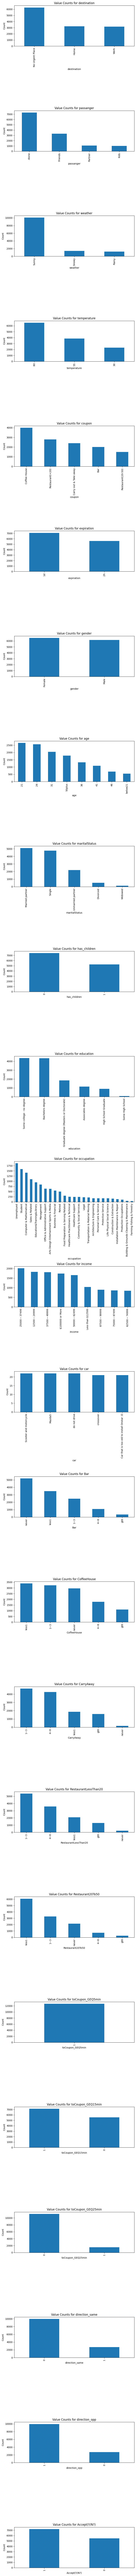

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(8, 6 * len(df.columns)))

# Loop through columns and plot the value_counts
for i, column in enumerate(df.columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], title=f'Value Counts for {column}')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout() #tight_layout(): Adjusts subplots to fit into the figure area.
plt.show()

CHECKING THE NUMBER OF NULL VALUES PRESENT IN THE COLUMNS

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
car,12576
CoffeeHouse,217
Restaurant20To50,189
CarryAway,151
RestaurantLessThan20,130
Bar,107
destination,0
direction_opp,0
direction_same,0
toCoupon_GEQ25min,0


In [ ]:
(df['car'].isnull().sum())/len(df['car'])*100

99.14853358561967



*   IDEALLY THE COLUMN 'CAR' SHOULD BE DROPPED BECAUSE THIS COLUMN HAS ALMOST ALL VALUES ARE NULL
*   COLOMNS WHICH HAS >30% OF NULL VALUES SHOULD BE REMOVED FROM THE MODEL.





In [ ]:
df.drop(columns='car', inplace=True)

THE OTHER COLUMNS WHICH HAS NULL VALUES ARE CATEGORICAL VALUES AND WE ARE IMPUTING THOSE COLUMN WITH THE MODE()

In [ ]:
#filling null values

df['CoffeeHouse'] = df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0])
df['Bar'] = df['Bar'].fillna(df['Bar'].mode()[0])
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0])
df['CarryAway'] = df['CarryAway'].fillna(df['CarryAway'].mode()[0])
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0])


In [ ]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
has_children,0


In [ ]:
df.duplicated().sum()

291

WE ARE REMOVING DUPLICATE VALUES FROM OUR DATASET.

In [ ]:
#Removing Duplicate Values
df.drop_duplicates(inplace=True)

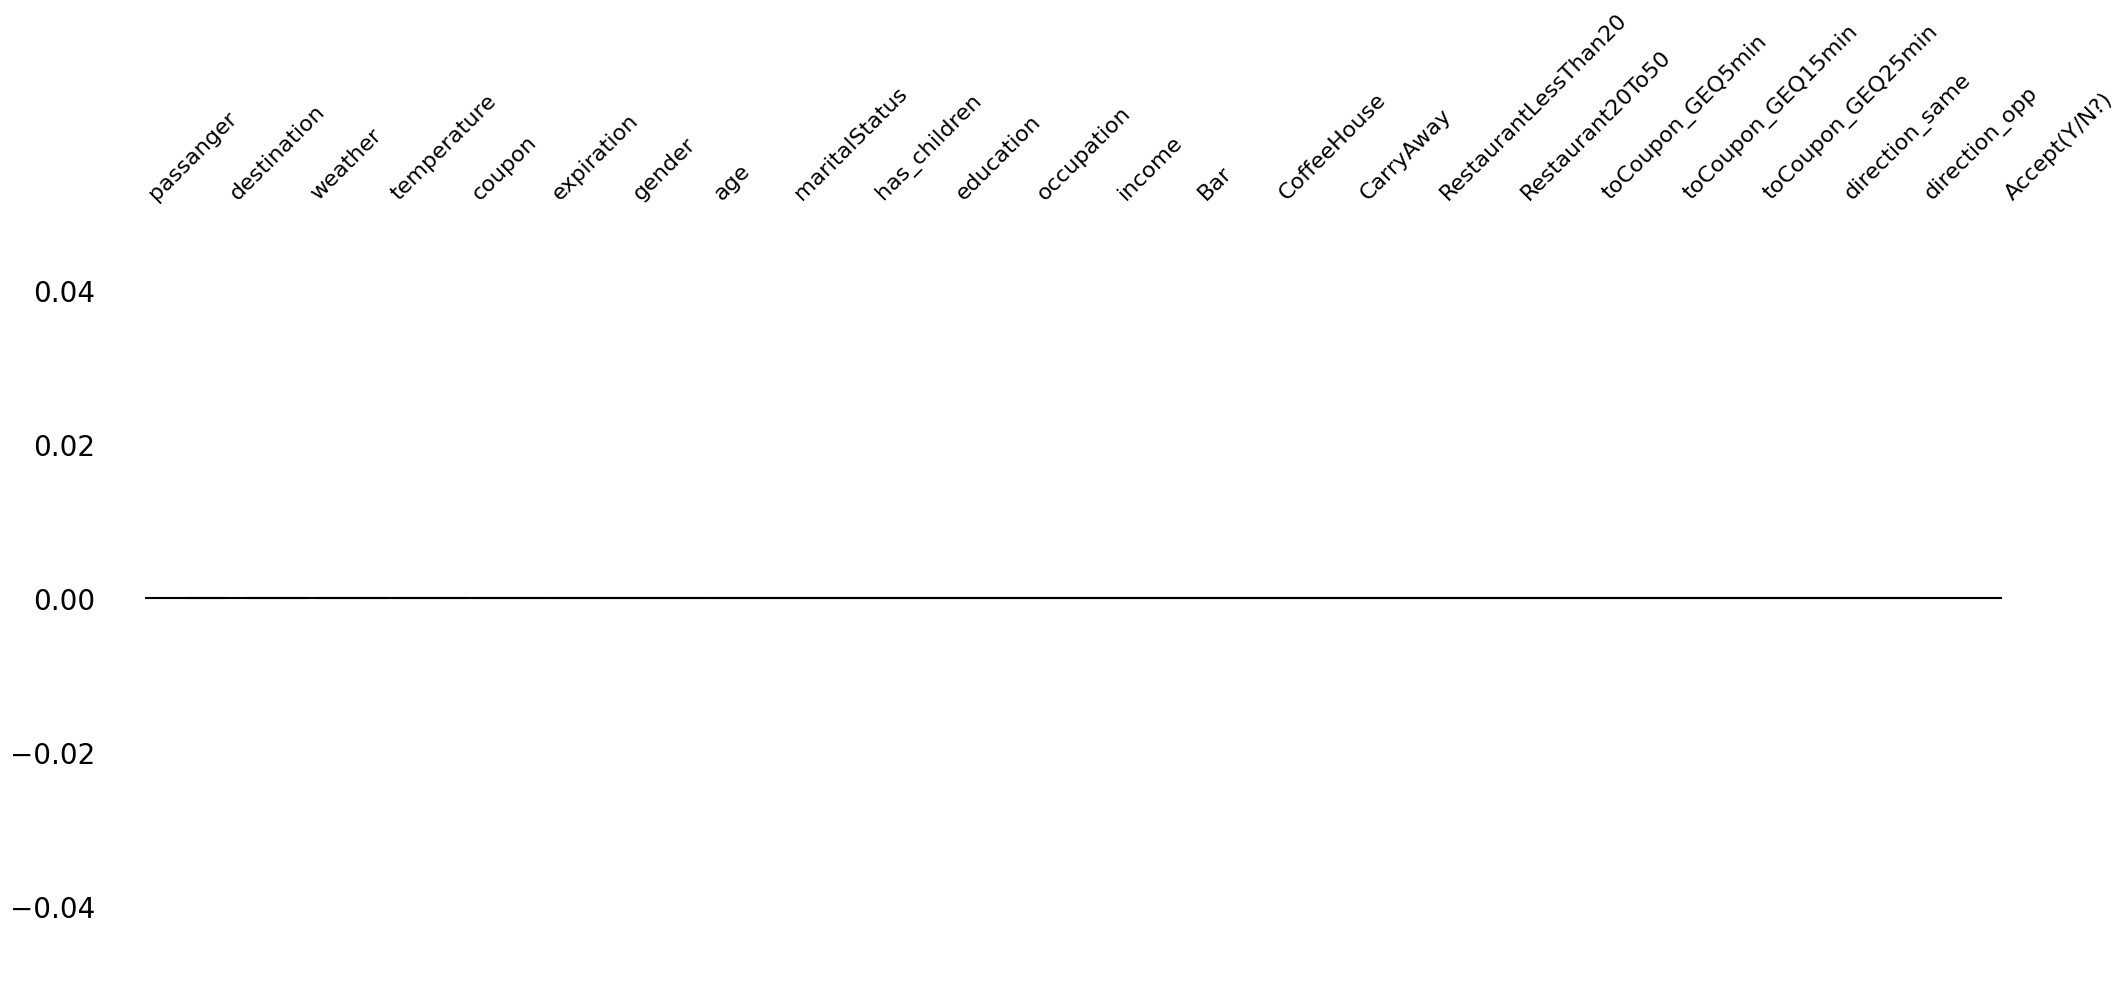

In [ ]:
import missingno as msno
msno.dendrogram(df)
plt.show()

# STARTING WITH THE EXPLORATORY DATA ANALYSIS

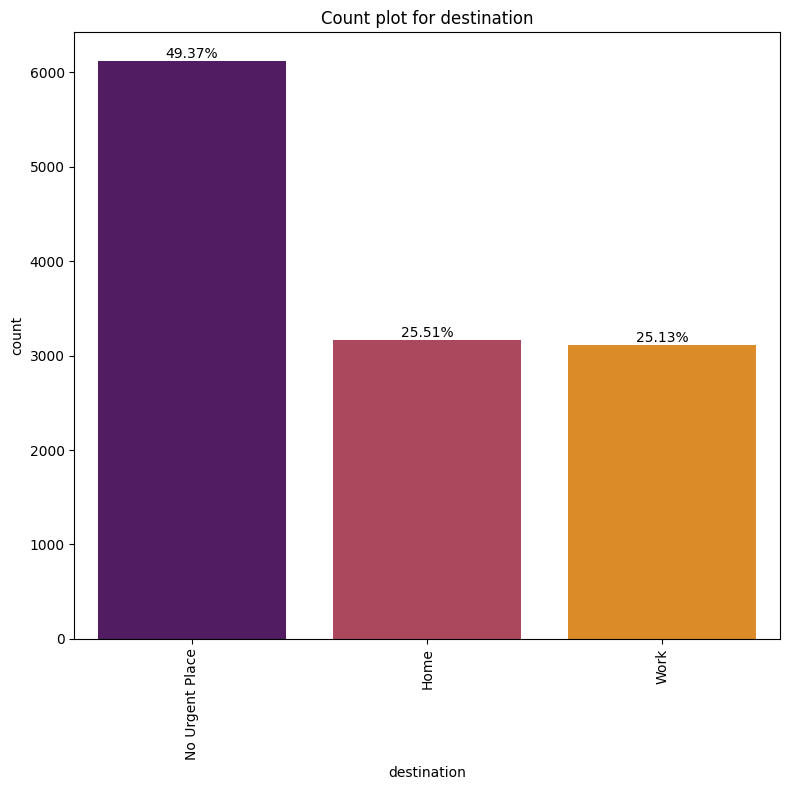

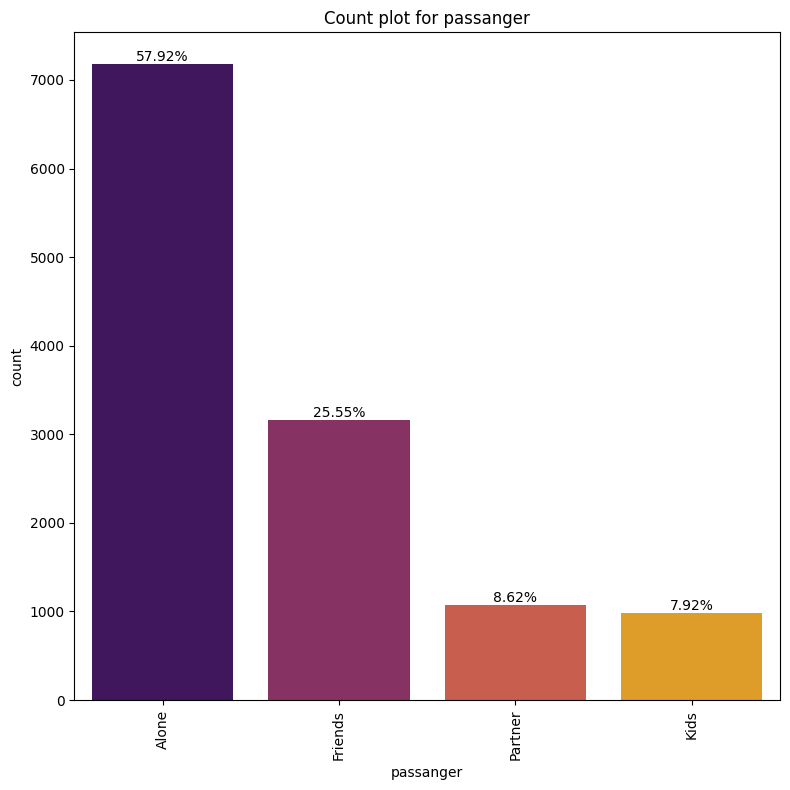

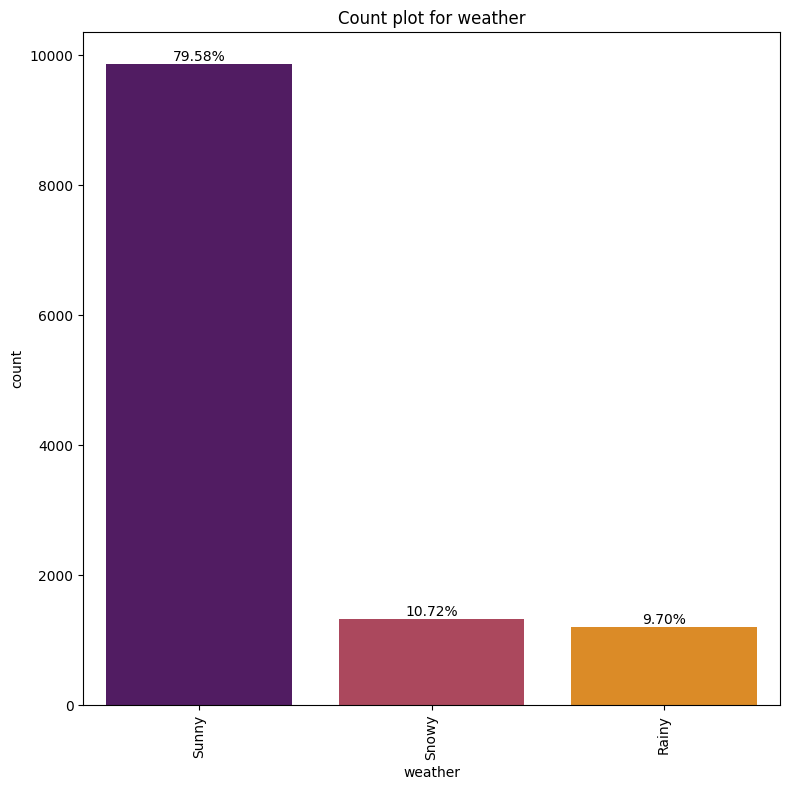

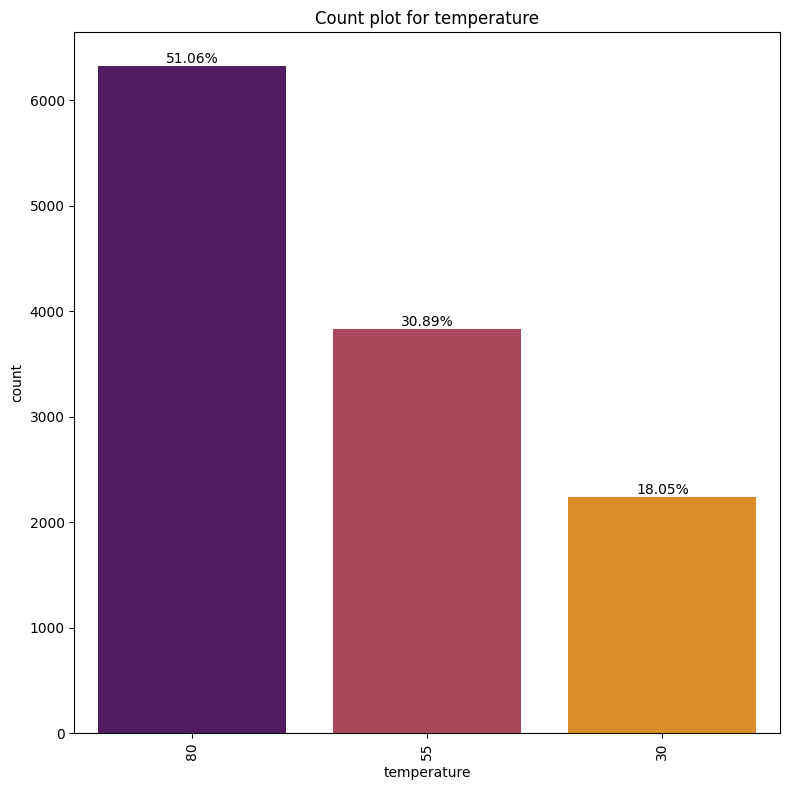

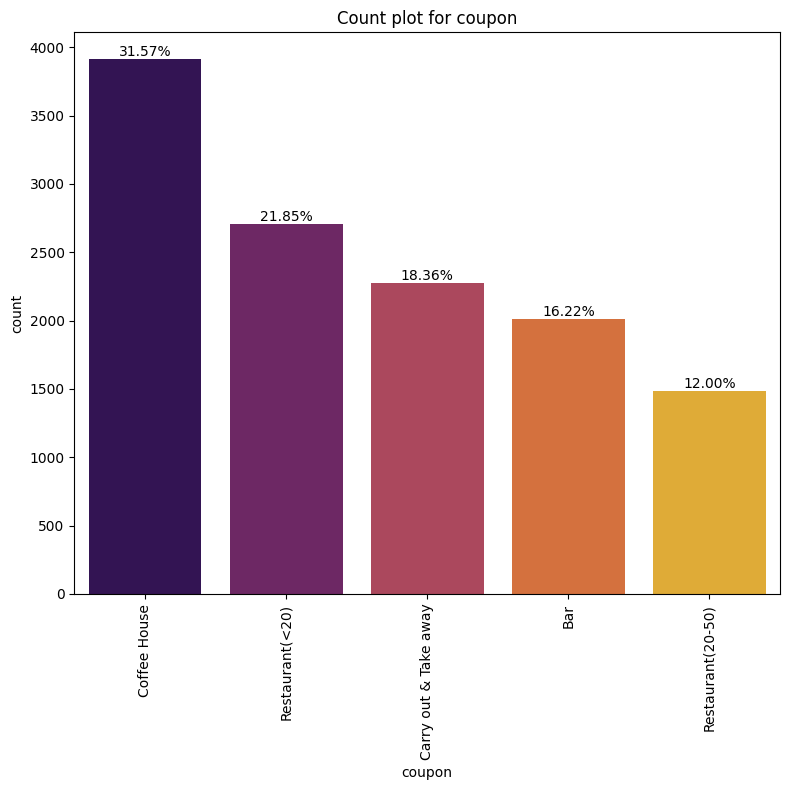

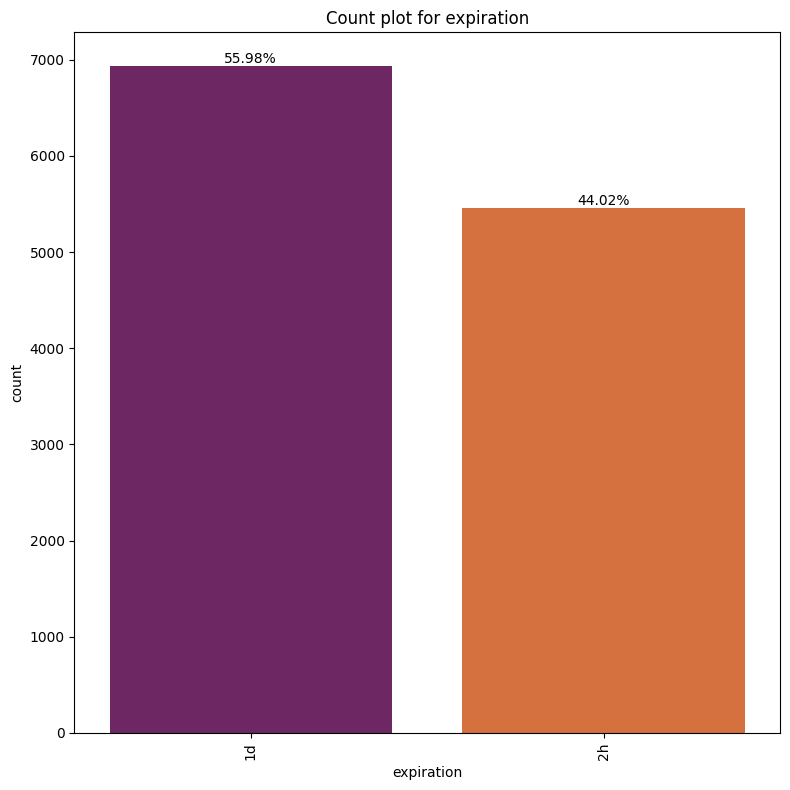

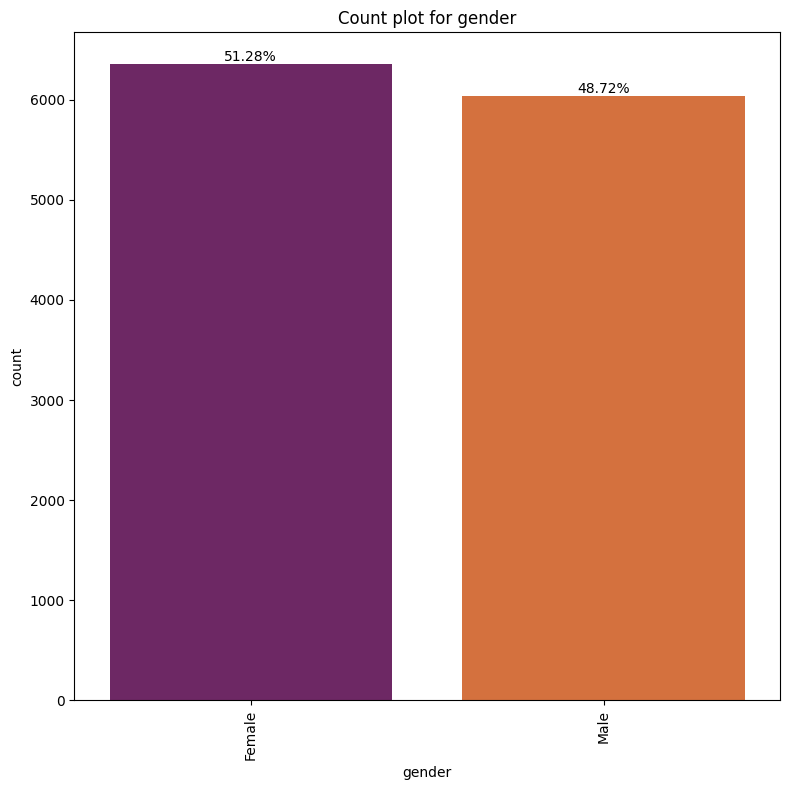

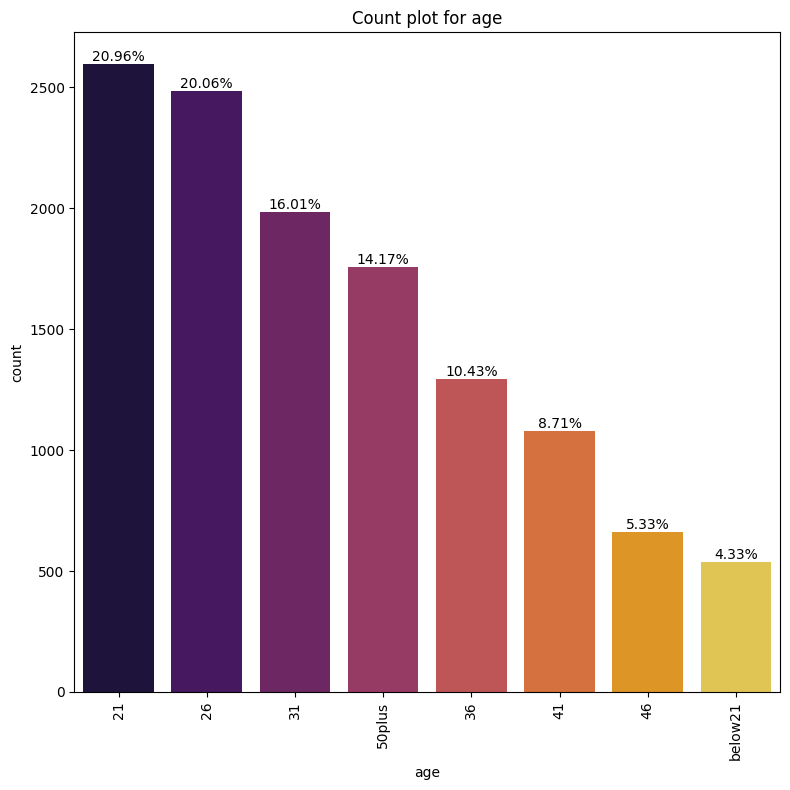

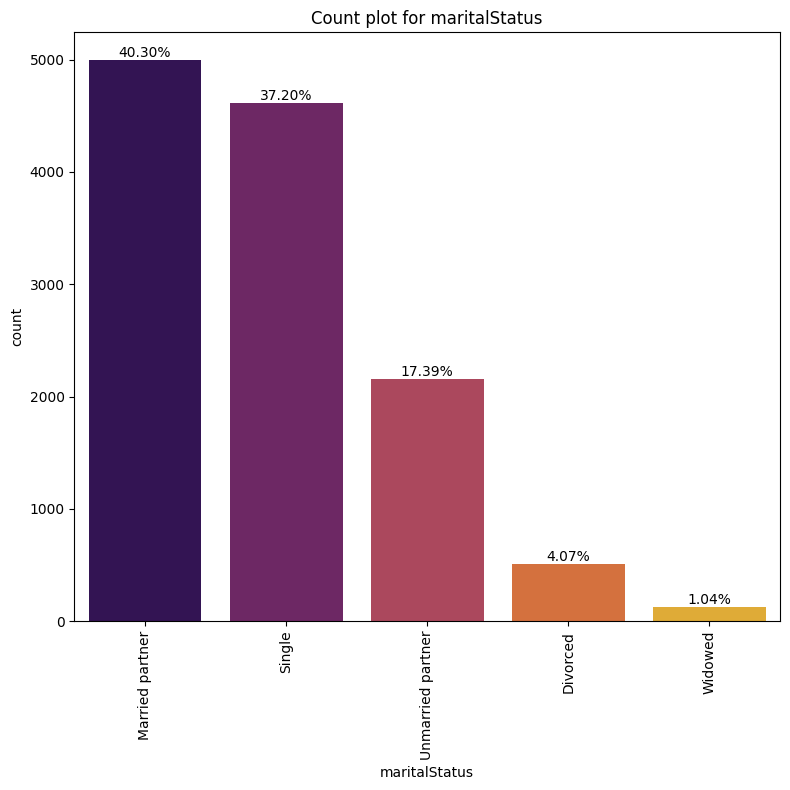

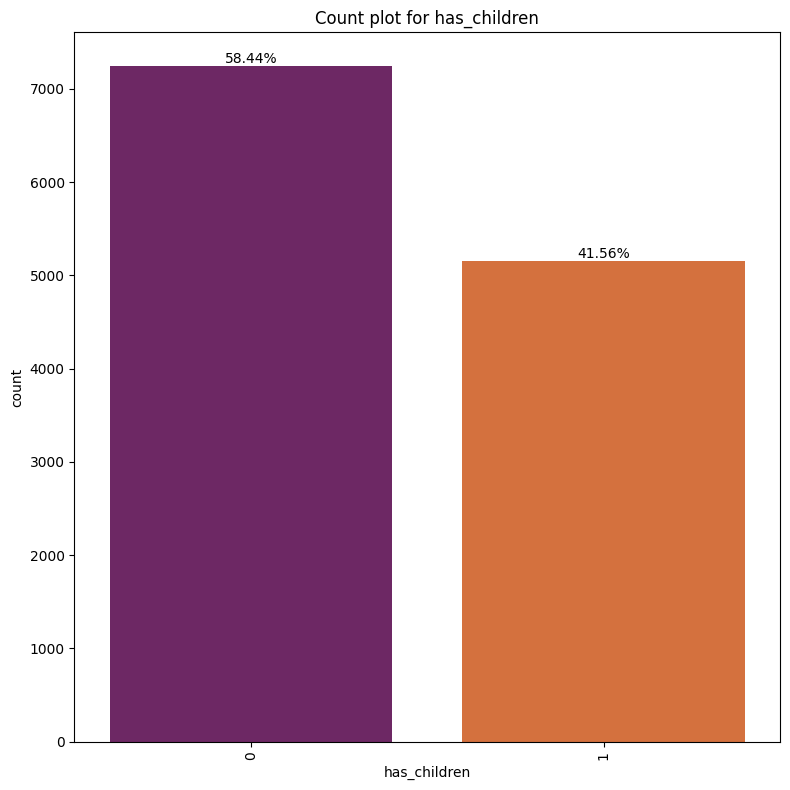

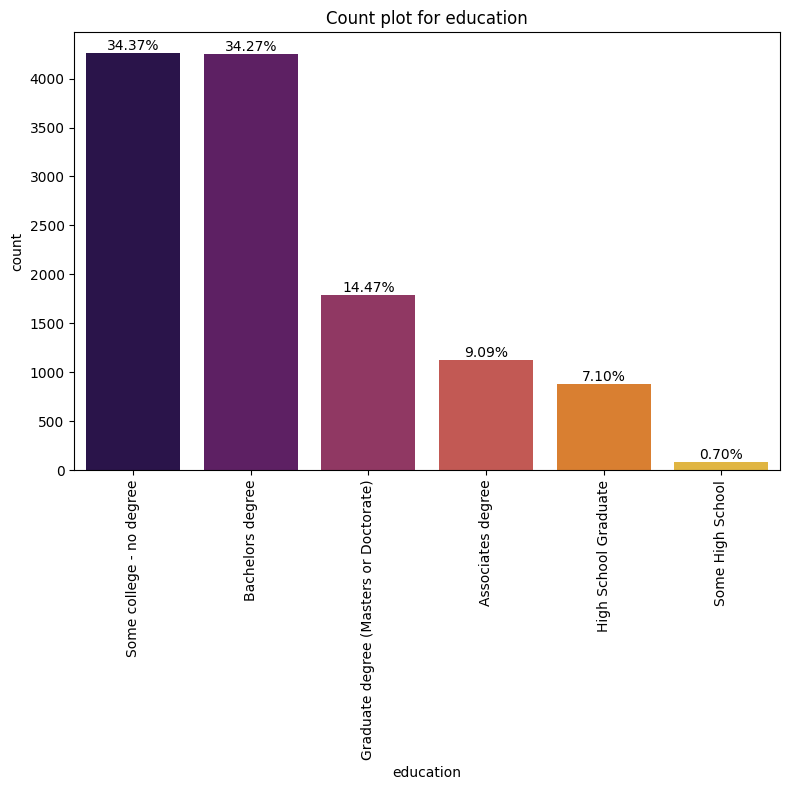

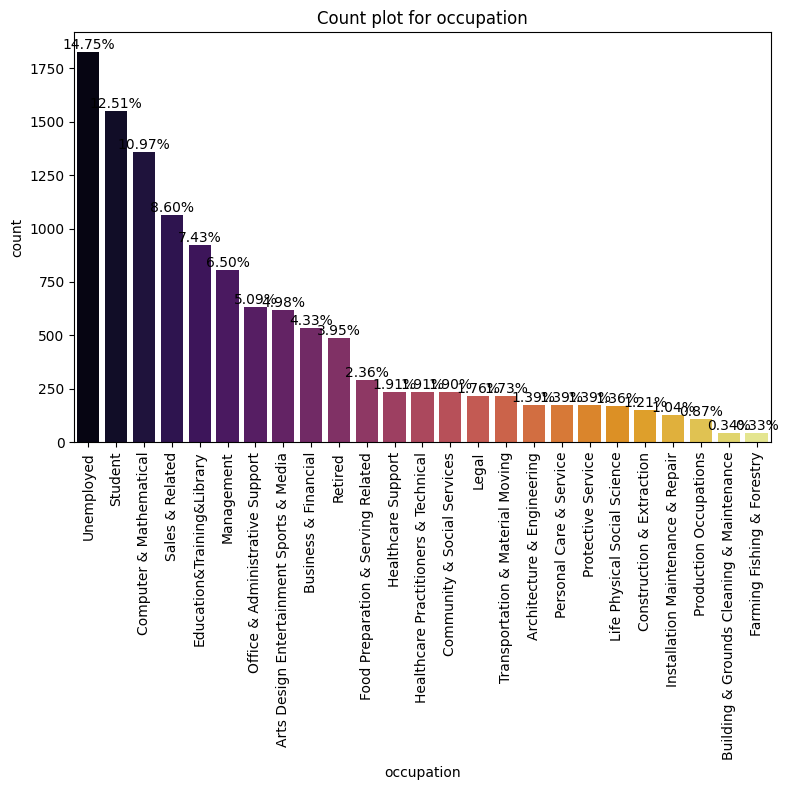

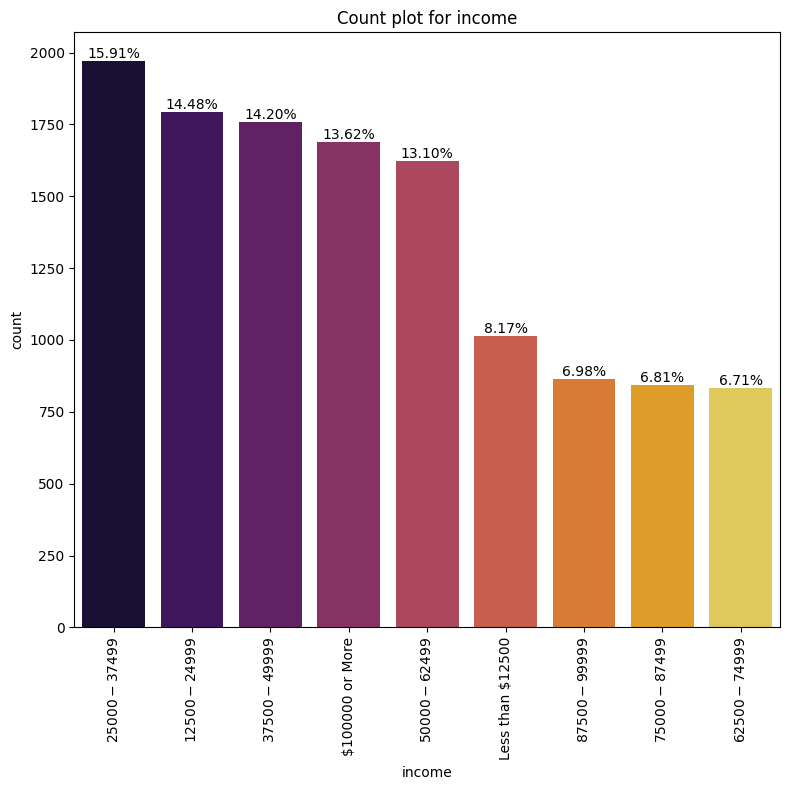

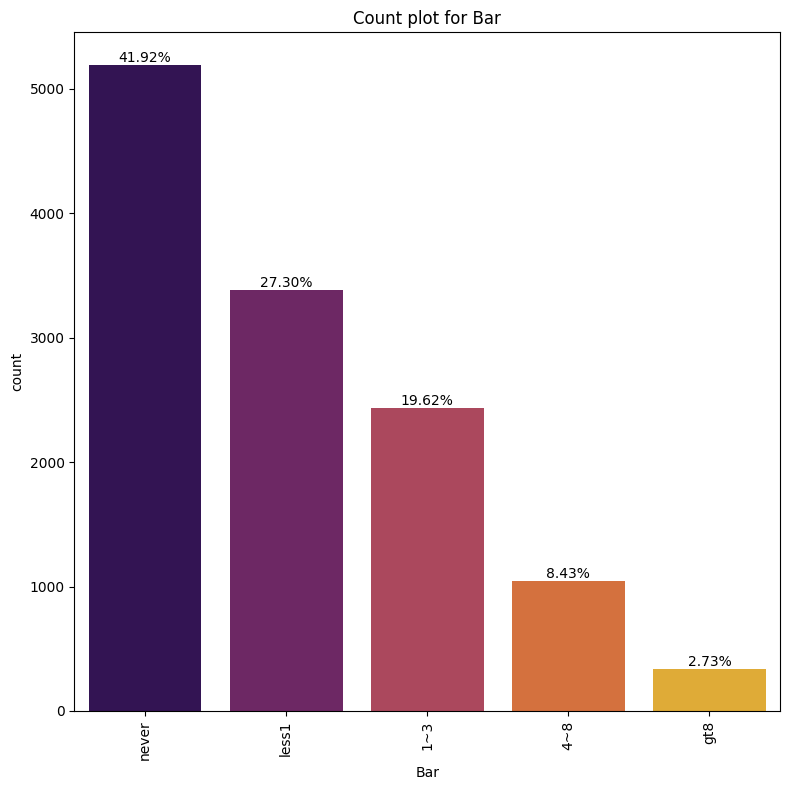

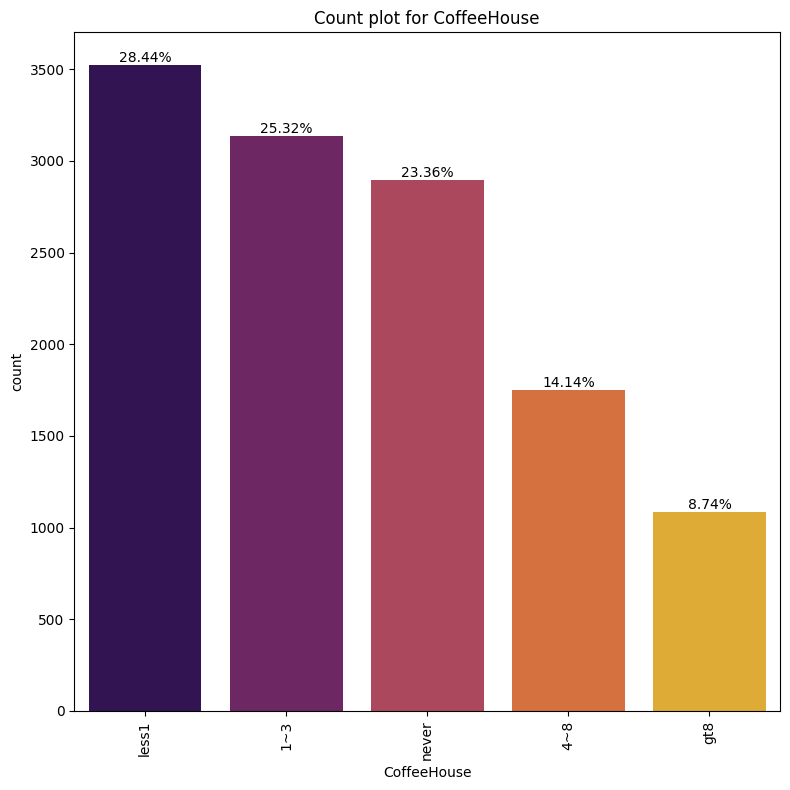

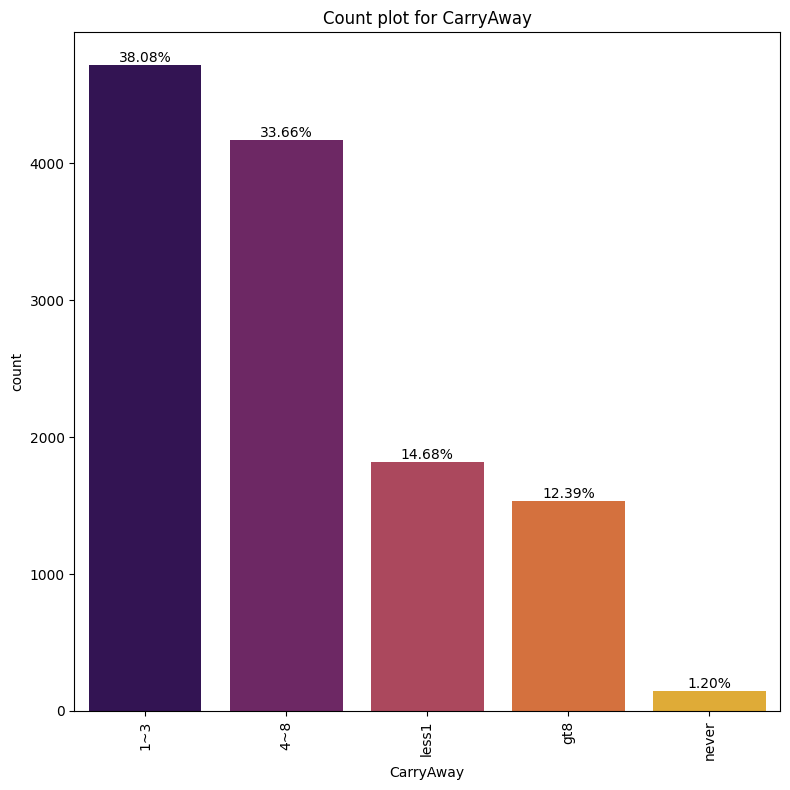

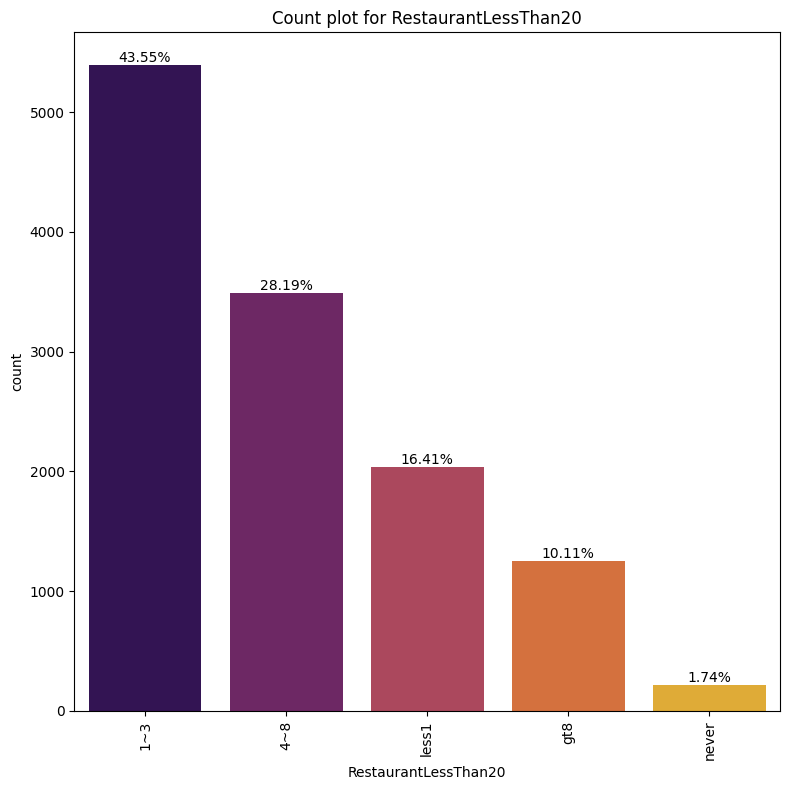

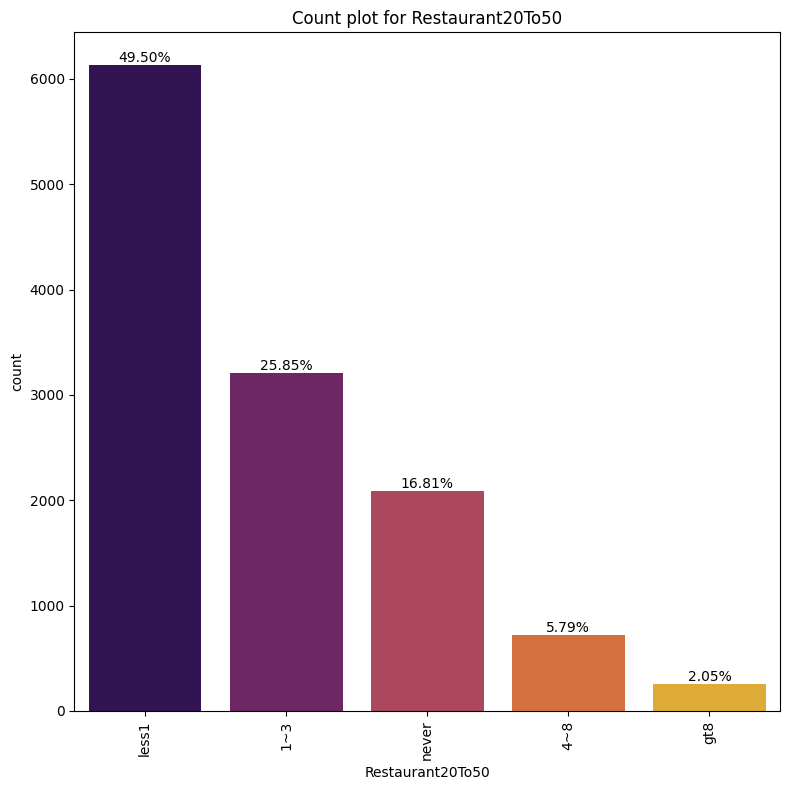

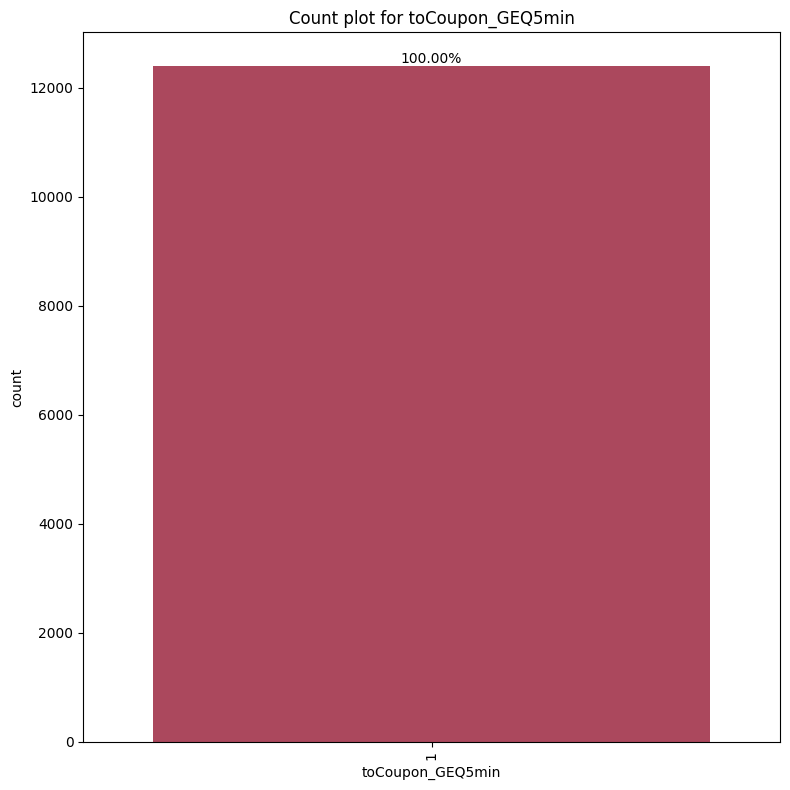

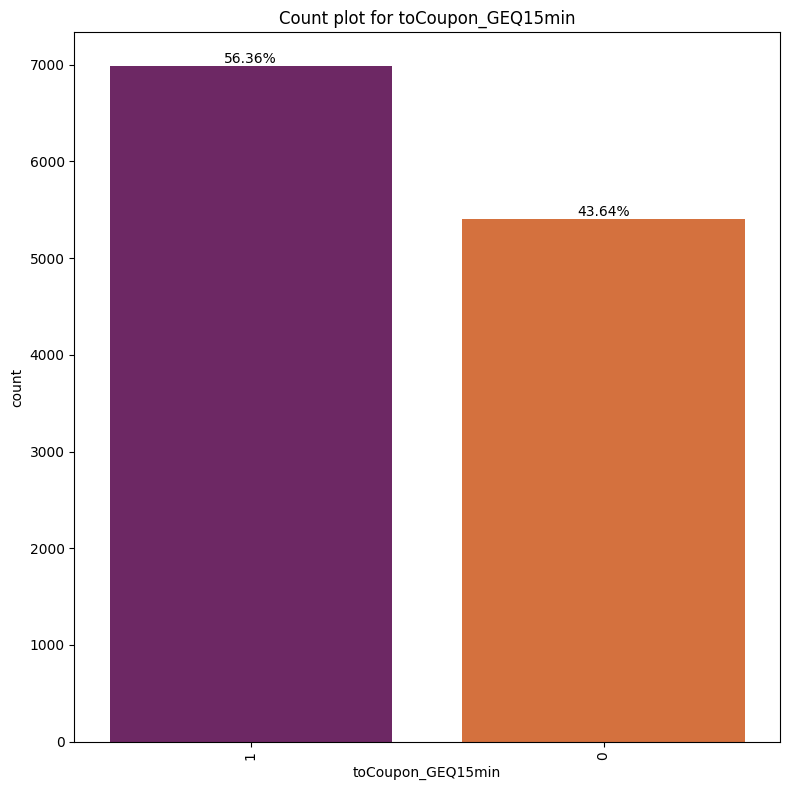

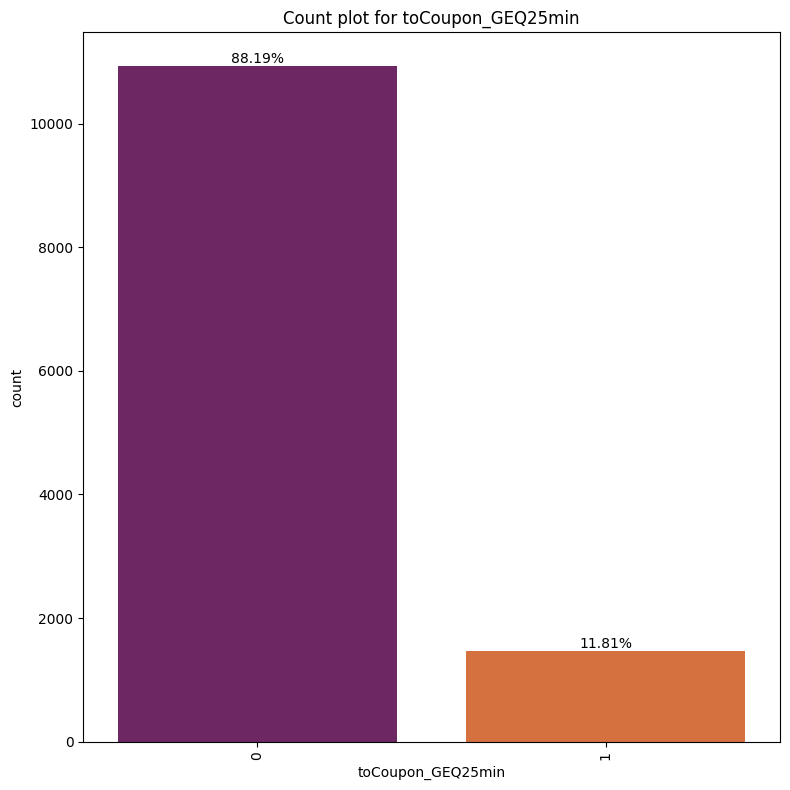

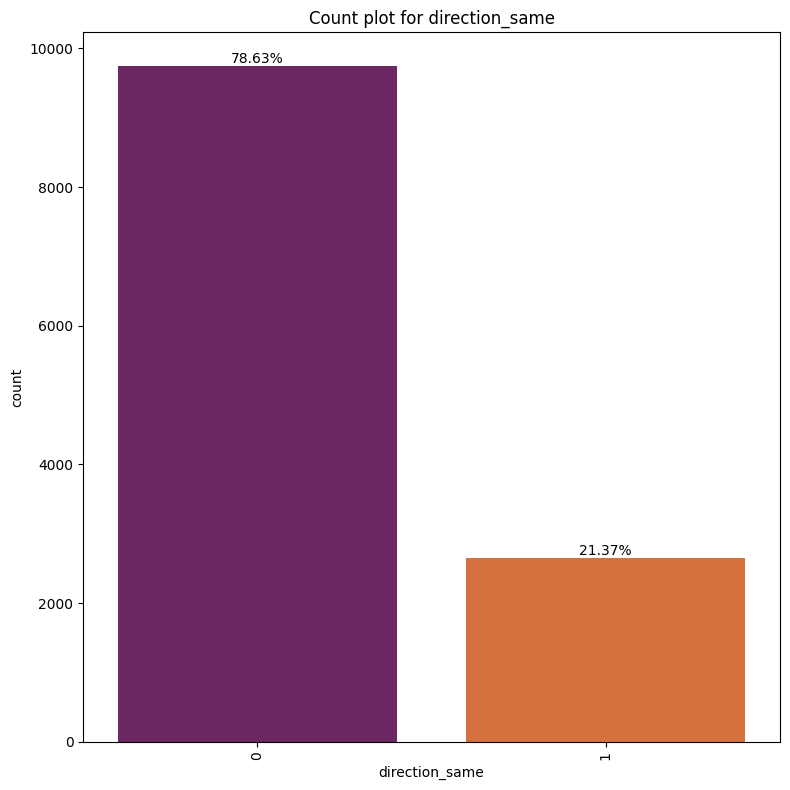

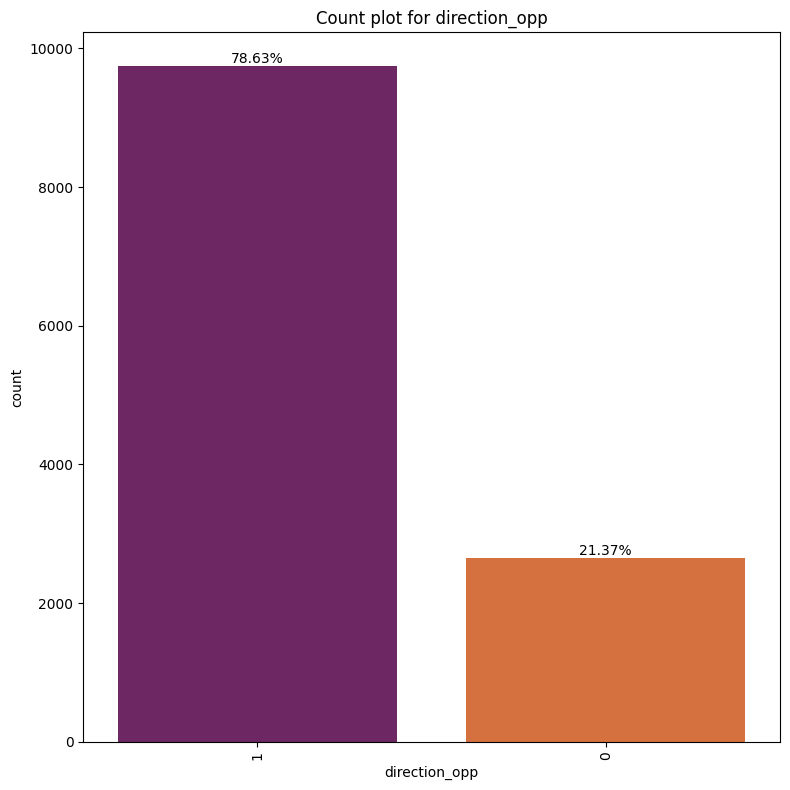

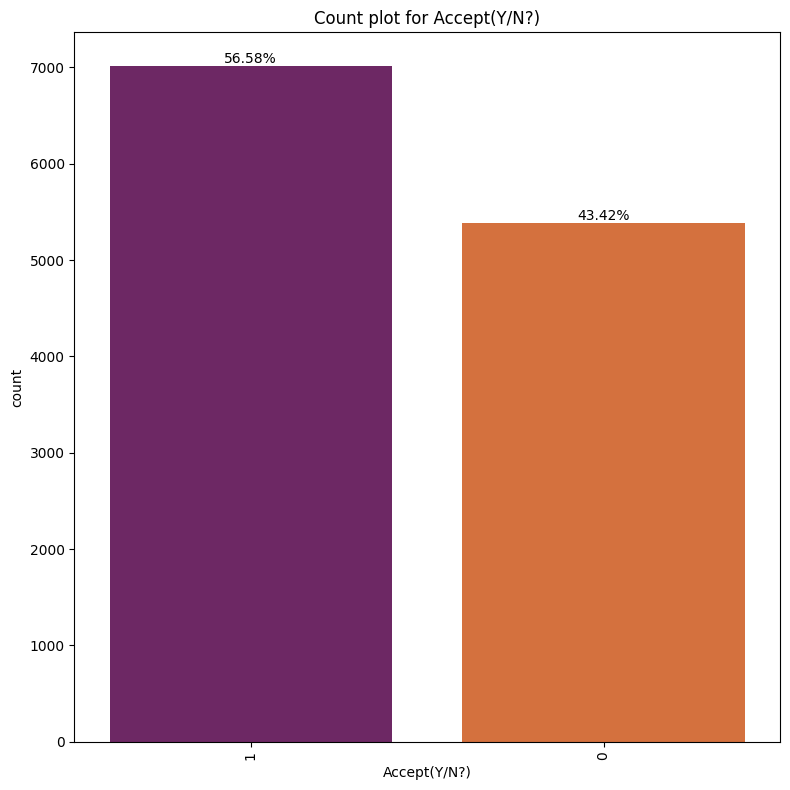

In [ ]:
# EDA
for col in df.columns:
  plt.figure(figsize=(8,8))
  ax=sns.countplot(x=col,data=df,palette='inferno',order=df[col].value_counts().index)
  plt.xticks(rotation=90)
  for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f"{rect.get_height()/len(df) * 100:.2f}%",
                     ha='center',va='bottom',color='black')
  plt.title(f'Count plot for {col}')
  plt.tight_layout()
  plt.show()


# EDA ANALYSIS



*   50% of the customers travel to non-urgent locations, while the remaining 50% are split between work or home.

*   Customers are either traveling alone or with friends; very few children and partners are traveling with them.
*   The majority of the customers travel in sunny weather with high temperatures.

*   The number of male and female clients is nearly equal.
*   There are extremely few customers under the age of 21, and the customers' ages range from 21 to 50.

*  We could see that there are more unemployed, students, computer and math professionals, salespeople, and related individuals under occupation.
*   Based on the provided data, we can see that very few individuals favor bars, and that consumers most frequently choose the carryout option, which is followed by coffee shops.

*   We may observe that the acceptance rate of those coupons is declining as the distance to the restaurant grows. Consumers are favoring restaurants that are close by.
*   We may observe that the acceptance rate of those coupons is declining as the distance to the restaurant grows. Consumers are favoring restaurants that are close by.












# DATA CLEANING

CONVERTING THE COLUMN 'INCOME' TO THE NUMERIC COLUMN

In [ ]:
#Data Preprocessing
def convert_income_range(income_range):
    if 'or More' in income_range:

        return 100000
    elif 'Less than' in income_range:

        return 12500
    else:
        # Handle range as before, splitting and calculating average
        lower, upper = income_range.replace('$', '').split(' - ')
        lower, upper = int(lower), int(upper)
        return (lower + upper) / 2

# Apply the function to the 'income_range' column
df['income'] = df['income'].apply(convert_income_range)



In [ ]:
df['income']

,income
0,43749.5
1,43749.5
2,43749.5
3,43749.5
4,43749.5
...,...
12679,81249.5
12680,81249.5
12681,81249.5
12682,81249.5


In [ ]:
df.income.value_counts()

,count
income,
31249.5,1972
18749.5,1795
43749.5,1760
100000.0,1688
56249.5,1624
12500.0,1013
93749.5,865
81249.5,844
68749.5,832


CONVERTING THE COLUMN 'Bar'
'CoffeeHouse',
'CarryAway',  
'RestaurantLessThan20',
'Restaurant20To50'

TO  NUMERIC COLUMN

In [ ]:
def clean_range(value):
    # Print the raw value before processing
    print(f"Processing value: {value}")

    # First, check if the value is NaN (handle missing data first)
    if pd.isna(value):
        print(f"Detected NaN value: {value}, returning NaN.")  # Debugging message
        return np.nan  # Return NaN for missing values

    # Convert value to string (to ensure proper string methods can be applied)
    value = str(value).lower().strip()  # Convert to string, lowercase, and strip any extra spaces

    # Print cleaned value for debugging
    print(f"Cleaned value: {value}")

    # Handling specific cases
    if value == 'never':
        return 0  # 'never' means 0
    elif value == 'less1':
        return 0  # 'less1' means 0
    elif value == 'gt8':
        return 9  # 'gt8' means greater than 8, return 9 (or some other value)
    elif '~' in value:  # Handle ranges like '1~3' or '4~8'
        try:
            lower, upper = value.split('~')
            lower, upper = int(lower), int(upper)
            # Generate a list of all integers from lower to upper (inclusive)
            range_values = list(range(lower, upper + 1))
            return np.mean(range_values)  # Return the mean of the list of numbers
        except ValueError:
            print(f"Error in range format: {value}")
            return np.nan  # If there's an issue in splitting the range, return NaN
    else:
        print(f"Unexpected value format: {value}")
        return np.nan  # If the value doesn't match any expected case, return NaN

# Apply the function to clean the data
df['Bar'] = df['Bar'].apply(clean_range)
df['CoffeeHouse'] = df['CoffeeHouse'].apply(clean_range)
df['CarryAway'] = df['CarryAway'].apply(clean_range)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].apply(clean_range)
df['Restaurant20To50'] = df['Restaurant20To50'].apply(clean_range)

Streaming output truncated to the last 5000 lines.
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Processing value: less1
Cleaned value: less1
Proc

In [ ]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1,1
1,No Urgent Place,Friends,Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1,0
2,No Urgent Place,Friends,Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,1
3,No Urgent Place,Friends,Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0
4,No Urgent Place,Friends,Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,1,1,0,1,0


In [ ]:
Data_set = df[['Bar','CarryAway','RestaurantLessThan20','Restaurant20To50','CoffeeHouse' ]].apply(pd.unique)
Data_set

,Bar,CarryAway,RestaurantLessThan20,Restaurant20To50,CoffeeHouse
0,0.0,2.0,6.0,2.0,0.0
1,2.0,6.0,2.0,0.0,6.0
2,9.0,9.0,0.0,9.0,2.0
3,6.0,0.0,9.0,6.0,9.0


CONVERTING THE COLUMN 'EXPIRATION' TOT HE NUMERIC COLOMN AND CONVERTING IT INTO HOURS CALCULATION

In [ ]:
def days_to_hrs (days):
    if 'd' in days:
        return float(days.replace('d', '')) * 24
    elif 'h' in days:
        return float(days.replace('h', ''))

df['expiration'] = df['expiration'].apply(days_to_hrs)

In [ ]:
df['expiration'].isnull().sum()

0

In [ ]:
df['age'] = df['age'].replace(r'\D', '', regex=True)
df['age']
df.age.unique()

df['age'] = df['age'].astype(int)
df['age'].dtype

#def age_processing (age):

dtype('int64')

In [ ]:
df['age'].unique()

array([21, 46, 26, 31, 41, 50, 36])

# MODEL SELECTION

In [ ]:
#Preprocessing

y = df['Accept(Y/N?)']
y

,Accept(Y/N?)
0,1
1,0
2,1
3,0
4,0
...,...
12679,1
12680,1
12681,0
12682,0


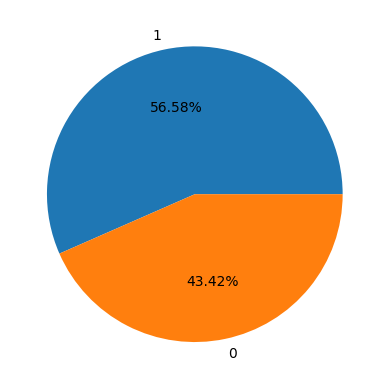

In [ ]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%1.2f%%')
plt.show()

There is no imbalance in the Target Colomn so we are good to go with the Train test split


CORRELATION CHECK AMONG THE FEATURES

In [ ]:
x = df.iloc[:,:23]
x



,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),24.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1
1,No Urgent Place,Friends,Sunny,80,Coffee House,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1
2,No Urgent Place,Friends,Sunny,80,Carry out & Take away,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1
3,No Urgent Place,Friends,Sunny,80,Coffee House,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1
4,No Urgent Place,Friends,Sunny,80,Coffee House,24.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,1,0
12680,Work,Alone,Rainy,55,Carry out & Take away,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,0,1
12681,Work,Alone,Snowy,30,Coffee House,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,0,0,1,0
12682,Work,Alone,Snowy,30,Bar,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,1,1,0,1




*   DROPPING THE COLOMN 'DIRECTION_OPP' DUE TO THE REASON THAT IT HHAS SAME DATA AS 'DIRECTION_SAME' COLOMN
*   DROPPING  THE COLOMN 'TOCOUPON_GE5MIN' BECAUSE IT HOLDS ALL VALUES ARE '1' WHICH DONT HAS ANY SIGNIFICANCE TO THE DATA



In [ ]:
x = x.drop(columns=['direction_opp','toCoupon_GEQ5min'])
x

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),24.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,0,0,0
1,No Urgent Place,Friends,Sunny,80,Coffee House,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,0,0,0
2,No Urgent Place,Friends,Sunny,80,Carry out & Take away,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0
3,No Urgent Place,Friends,Sunny,80,Coffee House,2.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0
4,No Urgent Place,Friends,Sunny,80,Coffee House,24.0,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,43749.5,0.0,0.0,2.0,6.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,0,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,0,0,0
12681,Work,Alone,Snowy,30,Coffee House,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,0,0,1
12682,Work,Alone,Snowy,30,Bar,24.0,Male,26,Single,0,Bachelors degree,Sales & Related,81249.5,0.0,0.0,2.0,6.0,2.0,1,1,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12393 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12393 non-null  object 
 1   passanger             12393 non-null  object 
 2   weather               12393 non-null  object 
 3   temperature           12393 non-null  int64  
 4   coupon                12393 non-null  object 
 5   expiration            12393 non-null  float64
 6   gender                12393 non-null  object 
 7   age                   12393 non-null  int64  
 8   maritalStatus         12393 non-null  object 
 9   has_children          12393 non-null  int64  
 10  education             12393 non-null  object 
 11  occupation            12393 non-null  object 
 12  income                12393 non-null  float64
 13  Bar                   12393 non-null  float64
 14  CoffeeHouse           12393 non-null  float64
 15  CarryAway             12

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

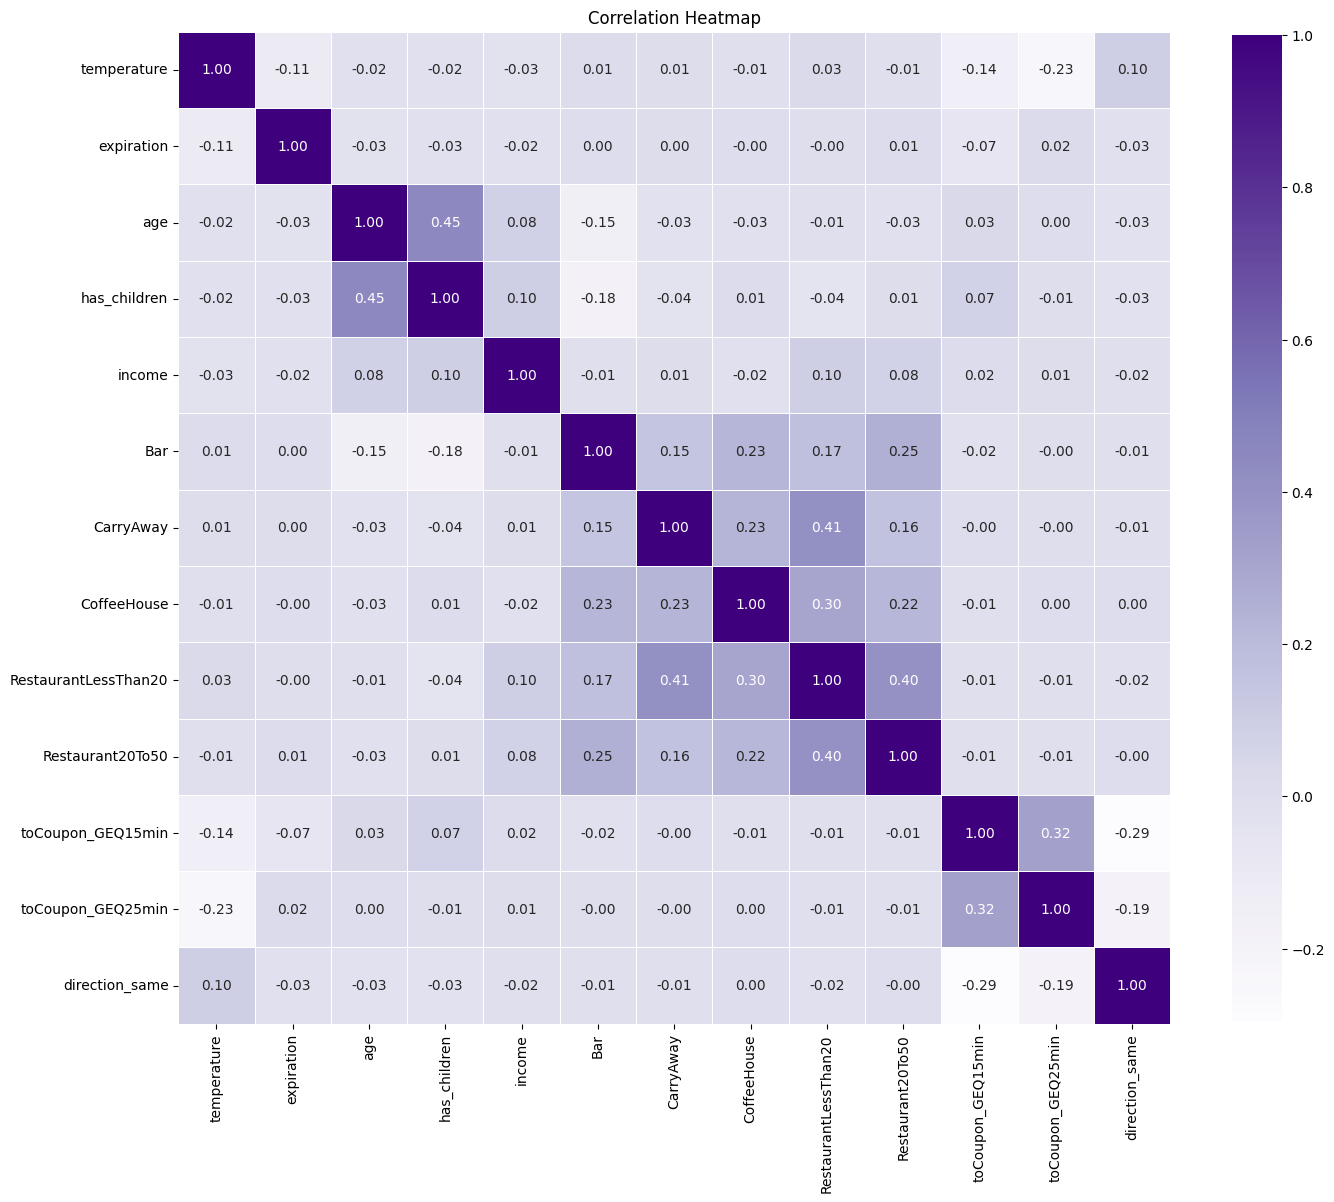

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(x_train[['temperature','expiration','age','has_children','income','Bar','CarryAway','CoffeeHouse',
                    'RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same']].corr(),annot=True,
            cmap='Purples',    # Set color map
    fmt='.2f',         # Format for correlation values
    linewidths=0.5,    # Optional: Add some space between cells
    square=True,       # Optional: Make the heatmap square
    cbar_kws={"shrink": 0.8}  # Optional: Shrink color bar to fit
)
plt.title("Correlation Heatmap")
plt.show()

DATA PREPROCESSING FOR THE CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# List of columns to scale
columns_to_scale = ['temperature','expiration', 'age', 'has_children', 'income', 'Bar', 'CarryAway',
                    'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50',
                    'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same']

# Fit the scaler on the training data and transform the columns at once
x_train[columns_to_scale] = std.fit_transform(x_train[columns_to_scale])

# Transform the test data using the already fitted scaler
x_test[columns_to_scale] = std.transform(x_test[columns_to_scale])

In [ ]:
x_train

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
3921,No Urgent Place,Friends,Sunny,-0.433209,Carry out & Take away,0.886723,Female,-0.620904,Single,-0.838345,Bachelors degree,Arts Design Entertainment Sports & Media,-1.135013,-0.523830,-0.729522,-0.661139,-1.224955,-0.546118,0.880929,-0.367715,-0.518130
9176,Work,Alone,Sunny,-1.743835,Bar,0.886723,Male,-0.127565,Single,-0.838345,Bachelors degree,Office & Administrative Support,-0.714374,-0.523830,-0.729522,-1.349227,-1.224955,-0.546118,0.880929,-0.367715,1.930016
5231,Home,Alone,Sunny,0.877417,Carry out & Take away,0.886723,Male,-0.127565,Married partner,1.192827,Graduate degree (Masters or Doctorate),Education&Training&Library,-0.714374,-0.523830,-0.047652,0.715037,0.887044,-0.546118,-1.135165,-0.367715,1.930016
1747,No Urgent Place,Friends,Sunny,0.877417,Coffee House,0.886723,Female,-0.620904,Single,-0.838345,Bachelors degree,Education&Training&Library,-0.714374,-0.523830,-0.047652,-1.349227,-0.520955,-0.546118,-1.135165,-0.367715,-0.518130
7767,Home,Partner,Sunny,0.877417,Coffee House,0.886723,Male,-1.114242,Unmarried partner,-0.838345,Bachelors degree,Business & Financial,0.547542,2.260545,-0.047652,0.715037,-0.520955,-0.546118,-1.135165,-0.367715,1.930016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12255,Home,Partner,Sunny,-1.743835,Restaurant(<20),-1.127748,Male,1.747121,Married partner,1.192827,Some college - no degree,Business & Financial,1.599155,-0.523830,-0.047652,0.715037,-0.520955,0.498249,0.880929,-0.367715,1.930016
5301,Work,Alone,Sunny,0.877417,Carry out & Take away,0.886723,Male,1.352450,Unmarried partner,-0.838345,Some college - no degree,Transportation & Material Moving,-1.135013,-0.523830,-0.729522,-0.661139,-1.224955,-0.546118,-1.135165,-0.367715,1.930016
5509,No Urgent Place,Partner,Sunny,0.877417,Restaurant(<20),0.886723,Male,-1.114242,Unmarried partner,-0.838345,Some college - no degree,Education&Training&Library,-0.714374,2.260545,-0.729522,-0.661139,-1.224955,-0.546118,-1.135165,-0.367715,-0.518130
870,No Urgent Place,Partner,Sunny,0.877417,Bar,0.886723,Female,-0.620904,Unmarried partner,-0.838345,Associates degree,Community & Social Services,0.126903,-0.523830,-0.047652,-0.661139,-0.520955,-0.546118,0.880929,-0.367715,-0.518130


FROM THE PASSENGER COLUMN WE ARE MAPPING THE VALUES TO 0,1 & 2


*  THE 'KIDS' AND 'PARTNER' HAS THE SAME VALUE BECAUSE THEY HAVE ALWAYS TRAVELLED TOGETHER IN ALL CIRCUMSTANCES.




In [ ]:
#Passenger Colomn
x_train['passanger'] = x_train['passanger'].map({'Alone':1,'Friends':0,'Kids':2,'Partner':2})
x_test['passanger'] = x_test['passanger'].map({'Alone':1,'Friends':0,'Kids':2,'Partner':2})



In [ ]:
#weather
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train['weather'] = le.fit_transform(x_train['weather'])
x_test['weather'] = le.transform(x_test['weather'])

In [ ]:
#gender
le = LabelEncoder()
x_train['gender'] = le.fit_transform(x_train['gender'])
x_test['gender'] = le.transform(x_test['gender'])

In [ ]:
#destination
x_train['destination'] = x_train['destination'].map({'Work':0,'No Urgent Place':1,'Home':2})
x_test['destination'] = x_test['destination'].map({'Work':0,'No Urgent Place':1,'Home':2})

In [ ]:
#dMarital status
x_train['maritalStatus'] = x_train['maritalStatus'].map({'Single':0,'Divorced':0,'Unmarried partner':0,'Married partner':1,'Widowed':0})
x_test['maritalStatus'] = x_test['maritalStatus'].map({'Single':0,'Divorced':0,'Unmarried partner':0,'Married partner':1,'Widowed':0})

In [ ]:
#gender
le = LabelEncoder()
x_train['coupon'] = le.fit_transform(x_train['coupon'])
x_test['coupon'] = le.transform(x_test['coupon'])

In [ ]:
#education
le = LabelEncoder()
x_train['education'] = le.fit_transform(x_train['education'])
x_test['education'] = le.transform(x_test['education'])

In [ ]:
pd.get_dummies(x_train['occupation']).astype(int)

,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,Installation Maintenance & Repair,Legal,Life Physical Social Science,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
3921,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5231,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1747,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7767,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5509,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
870,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train['Unemployed'] = pd.get_dummies(x_train.occupation).astype('int')['Unemployed']
x_train['Student'] = pd.get_dummies(x_train.occupation).astype('int')['Student']
x_train['Computer & Mathematical'] = pd.get_dummies(x_train.occupation).astype('int')['Computer & Mathematical']
x_train['Sales & Related'] = pd.get_dummies(x_train.occupation).astype('int')['Sales & Related']
x_train['Education&Training&Library'] = pd.get_dummies(x_train.occupation).astype('int')['Education&Training&Library']
x_train['Management'] = pd.get_dummies(x_train.occupation).astype('int')['Management']
x_train['Office & Administrative Support'] = pd.get_dummies(x_train.occupation).astype('int')['Office & Administrative Support']
x_train['Arts Design Entertainment Sports & Media'] = pd.get_dummies(x_train.occupation).astype('int')['Arts Design Entertainment Sports & Media']
x_train['Business & Financial'] = pd.get_dummies(x_train.occupation).astype('int')['Business & Financial']
x_train['Retired'] = pd.get_dummies(x_train.occupation).astype('int')['Retired']
x_train['Food Preparation & Serving Related'] = pd.get_dummies(x_train.occupation).astype('int')['Food Preparation & Serving Related']
x_train['Healthcare Support'] = pd.get_dummies(x_train.occupation).astype('int')['Healthcare Support']
x_train['Transportation & Material Moving'] = pd.get_dummies(x_train.occupation).astype('int')['Transportation & Material Moving']
x_train['Legal'] = pd.get_dummies(x_train.occupation).astype('int')['Legal']
x_train['Community & Social Services'] = pd.get_dummies(x_train.occupation).astype('int')['Community & Social Services']
x_train['Healthcare Practitioners & Technical'] = pd.get_dummies(x_train.occupation).astype('int')['Healthcare Practitioners & Technical']
x_train['Architecture & Engineering'] = pd.get_dummies(x_train.occupation).astype('int')['Architecture & Engineering']
x_train['Life Physical Social Science'] = pd.get_dummies(x_train.occupation).astype('int')['Life Physical Social Science']
x_train['Protective Service'] = pd.get_dummies(x_train.occupation).astype('int')['Protective Service']
x_train['Personal Care & Service'] = pd.get_dummies(x_train.occupation).astype('int')['Personal Care & Service']
x_train['Construction & Extraction'] = pd.get_dummies(x_train.occupation).astype('int')['Construction & Extraction']
x_train['Installation Maintenance & Repair'] = pd.get_dummies(x_train.occupation).astype('int')['Installation Maintenance & Repair']
x_train['Production Occupations'] = pd.get_dummies(x_train.occupation).astype('int')['Production Occupations']
x_train['Building & Grounds Cleaning & Maintenance'] = pd.get_dummies(x_train.occupation).astype('int')['Building & Grounds Cleaning & Maintenance']
del x_train['occupation']
x_train.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Unemployed,Student,Computer & Mathematical,Sales & Related,Education&Training&Library,Management,Office & Administrative Support,Arts Design Entertainment Sports & Media,Business & Financial,Retired,Food Preparation & Serving Related,Healthcare Support,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Architecture & Engineering,Life Physical Social Science,Protective Service,Personal Care & Service,Construction & Extraction,Installation Maintenance & Repair,Production Occupations,Building & Grounds Cleaning & Maintenance
3921,1,0,2,-0.433209,1,0.886723,0,-0.620904,0,-0.838345,1,-1.135013,-0.523830,-0.729522,-0.661139,-1.224955,-0.546118,0.880929,-0.367715,-0.518130,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9176,0,1,2,-1.743835,0,0.886723,1,-0.127565,0,-0.838345,1,-0.714374,-0.523830,-0.729522,-1.349227,-1.224955,-0.546118,0.880929,-0.367715,1.930016,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5231,2,1,2,0.877417,1,0.886723,1,-0.127565,1,1.192827,2,-0.714374,-0.523830,-0.047652,0.715037,0.887044,-0.546118,-1.135165,-0.367715,1.930016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1747,1,0,2,0.877417,2,0.886723,0,-0.620904,0,-0.838345,1,-0.714374,-0.523830,-0.047652,-1.349227,-0.520955,-0.546118,-1.135165,-0.367715,-0.518130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7767,2,2,2,0.877417,2,0.886723,1,-1.114242,0,-0.838345,1,0.547542,2.260545,-0.047652,0.715037,-0.520955,-0.546118,-1.135165,-0.367715,1.930016,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test['Unemployed'] = pd.get_dummies(x_test.occupation).astype('int')['Unemployed']
x_test['Student'] = pd.get_dummies(x_test.occupation).astype('int')['Student']
x_test['Computer & Mathematical'] = pd.get_dummies(x_test.occupation).astype('int')['Computer & Mathematical']
x_test['Sales & Related'] = pd.get_dummies(x_test.occupation).astype('int')['Sales & Related']
x_test['Education&Training&Library'] = pd.get_dummies(x_test.occupation).astype('int')['Education&Training&Library']
x_test['Management'] = pd.get_dummies(x_test.occupation).astype('int')['Management']
x_test['Office & Administrative Support'] = pd.get_dummies(x_test.occupation).astype('int')['Office & Administrative Support']
x_test['Arts Design Entertainment Sports & Media'] = pd.get_dummies(x_test.occupation).astype('int')['Arts Design Entertainment Sports & Media']
x_test['Business & Financial'] = pd.get_dummies(x_test.occupation).astype('int')['Business & Financial']
x_test['Retired'] = pd.get_dummies(x_test.occupation).astype('int')['Retired']
x_test['Food Preparation & Serving Related'] = pd.get_dummies(x_test.occupation).astype('int')['Food Preparation & Serving Related']
x_test['Healthcare Support'] = pd.get_dummies(x_test.occupation).astype('int')['Healthcare Support']
x_test['Transportation & Material Moving'] = pd.get_dummies(x_test.occupation).astype('int')['Transportation & Material Moving']
x_test['Legal'] = pd.get_dummies(x_test.occupation).astype('int')['Legal']
x_test['Community & Social Services'] = pd.get_dummies(x_test.occupation).astype('int')['Community & Social Services']
x_test['Healthcare Practitioners & Technical'] = pd.get_dummies(x_test.occupation).astype('int')['Healthcare Practitioners & Technical']
x_test['Architecture & Engineering'] = pd.get_dummies(x_test.occupation).astype('int')['Architecture & Engineering']
x_test['Life Physical Social Science'] = pd.get_dummies(x_test.occupation).astype('int')['Life Physical Social Science']
x_test['Protective Service'] = pd.get_dummies(x_test.occupation).astype('int')['Protective Service']
x_test['Personal Care & Service'] = pd.get_dummies(x_test.occupation).astype('int')['Personal Care & Service']
x_test['Construction & Extraction'] = pd.get_dummies(x_test.occupation).astype('int')['Construction & Extraction']
x_test['Installation Maintenance & Repair'] = pd.get_dummies(x_test.occupation).astype('int')['Installation Maintenance & Repair']
x_test['Production Occupations'] = pd.get_dummies(x_test.occupation).astype('int')['Production Occupations']
x_test['Building & Grounds Cleaning & Maintenance'] = pd.get_dummies(x_test.occupation).astype('int')['Building & Grounds Cleaning & Maintenance']
del x_test['occupation']
x_test.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Unemployed,Student,Computer & Mathematical,Sales & Related,Education&Training&Library,Management,Office & Administrative Support,Arts Design Entertainment Sports & Media,Business & Financial,Retired,Food Preparation & Serving Related,Healthcare Support,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Architecture & Engineering,Life Physical Social Science,Protective Service,Personal Care & Service,Construction & Extraction,Installation Maintenance & Repair,Production Occupations,Building & Grounds Cleaning & Maintenance
10432,1,1,0,-0.433209,2,0.886723,0,-1.114242,0,-0.838345,3,-1.345315,0.404295,1.316089,1.747169,1.943043,2.586982,0.880929,-0.367715,-0.518130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10115,0,1,2,-1.743835,0,0.886723,0,0.365773,1,1.192827,2,1.388819,0.404295,1.316089,0.715037,0.887044,0.498249,0.880929,-0.367715,1.930016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7076,2,1,2,-1.743835,1,-1.127748,1,-0.620904,1,-0.838345,0,-0.293736,-0.523830,-0.729522,-0.661139,-0.520955,-0.546118,0.880929,-0.367715,1.930016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2170,1,0,2,0.877417,4,-1.127748,1,-1.114242,0,-0.838345,1,1.599155,2.260545,2.338895,0.715037,1.943043,0.498249,0.880929,-0.367715,-0.518130,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2372,2,1,2,-0.433209,3,0.886723,0,-1.114242,0,-0.838345,5,-0.714374,2.260545,-0.729522,1.747169,-0.520955,0.498249,0.880929,-0.367715,-0.518130,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Unemployed,Student,Computer & Mathematical,Sales & Related,Education&Training&Library,Management,Office & Administrative Support,Arts Design Entertainment Sports & Media,Business & Financial,Retired,Food Preparation & Serving Related,Healthcare Support,Transportation & Material Moving,Legal,Community & Social Services,Healthcare Practitioners & Technical,Architecture & Engineering,Life Physical Social Science,Protective Service,Personal Care & Service,Construction & Extraction,Installation Maintenance & Repair,Production Occupations,Building & Grounds Cleaning & Maintenance
3921,1,0,2,-0.433209,1,0.886723,0,-0.620904,0,-0.838345,1,-1.135013,-0.523830,-0.729522,-0.661139,-1.224955,-0.546118,0.880929,-0.367715,-0.518130,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9176,0,1,2,-1.743835,0,0.886723,1,-0.127565,0,-0.838345,1,-0.714374,-0.523830,-0.729522,-1.349227,-1.224955,-0.546118,0.880929,-0.367715,1.930016,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5231,2,1,2,0.877417,1,0.886723,1,-0.127565,1,1.192827,2,-0.714374,-0.523830,-0.047652,0.715037,0.887044,-0.546118,-1.135165,-0.367715,1.930016,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1747,1,0,2,0.877417,2,0.886723,0,-0.620904,0,-0.838345,1,-0.714374,-0.523830,-0.047652,-1.349227,-0.520955,-0.546118,-1.135165,-0.367715,-0.518130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7767,2,2,2,0.877417,2,0.886723,1,-1.114242,0,-0.838345,1,0.547542,2.260545,-0.047652,0.715037,-0.520955,-0.546118,-1.135165,-0.367715,1.930016,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12255,2,2,2,-1.743835,4,-1.127748,1,1.747121,1,1.192827,5,1.599155,-0.523830,-0.047652,0.715037,-0.520955,0.498249,0.880929,-0.367715,1.930016,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5301,0,1,2,0.877417,1,0.886723,1,1.352450,0,-0.838345,5,-1.135013,-0.523830,-0.729522,-0.661139,-1.224955,-0.546118,-1.135165,-0.367715,1.930016,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5509,1,2,2,0.877417,4,0.886723,1,-1.114242,0,-0.838345,5,-0.714374,2.260545,-0.729522,-0.661139,-1.224955,-0.546118,-1.135165,-0.367715,-0.518130,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
870,1,2,2,0.877417,0,0.886723,0,-0.620904,0,-0.838345,0,0.126903,-0.523830,-0.047652,-0.661139,-0.520955,-0.546118,0.880929,-0.367715,-0.518130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
param_list={
    'max_iter':[200,300,500,400,500,600,700,800,900,1000],
}
cv_log=GridSearchCV(lr_model,cv=5,param_grid=param_list,n_jobs=-1)
cv_log.fit(x_train,y_train)
print('The Best Parameters using GridSearch CV :\n',cv_log.best_params_)
log=LogisticRegression(**cv_log.best_params_)
log.fit(x_train,y_train)
lr_train_pred=log.predict(x_train)
lr_train_accuracy=accuracy_score(lr_train_pred,y_train)
lr_test_pred=log.predict(x_test)
lr_test_accuracy=accuracy_score(lr_test_pred,y_test)
print('Training Accuracy',lr_train_accuracy)
print('Test Accuracy',lr_test_accuracy)
print(classification_report(lr_test_pred,y_test))

The Best Parameters using GridSearch CV :
 {'max_iter': 200}
Training Accuracy 0.6282547880352916
Test Accuracy 0.6131010003226848
              precision    recall  f1-score   support

           0       0.41      0.59      0.48       945
           1       0.78      0.62      0.69      2154

    accuracy                           0.61      3099
   macro avg       0.59      0.61      0.59      3099
weighted avg       0.66      0.61      0.63      3099



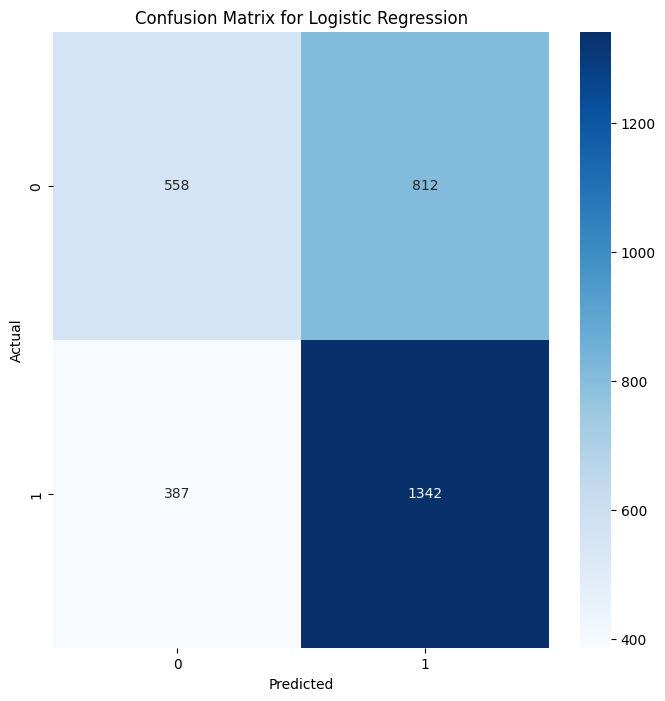

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,lr_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rfc_model = RandomForestClassifier()
param_list = {
    'n_estimators':[100,300,500,1000],
    'max_depth':[100,200,300],
    'bootstrap':[True,False],
    'max_features':['sqrt','log2',None],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[2,3,4]
}
cv_rfc=RandomizedSearchCV(rfc_model,cv=5,param_distributions = param_list,n_jobs=-1)
cv_rfc.fit(x_train,y_train)
print('The Best Parameters using GridSearch CV :\n',cv_rfc.best_params_)


The Best Parameters using GridSearch CV :
 {'n_estimators': 1000, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 200, 'criterion': 'entropy', 'bootstrap': True}


Variable Importance ( Feature Engineering )

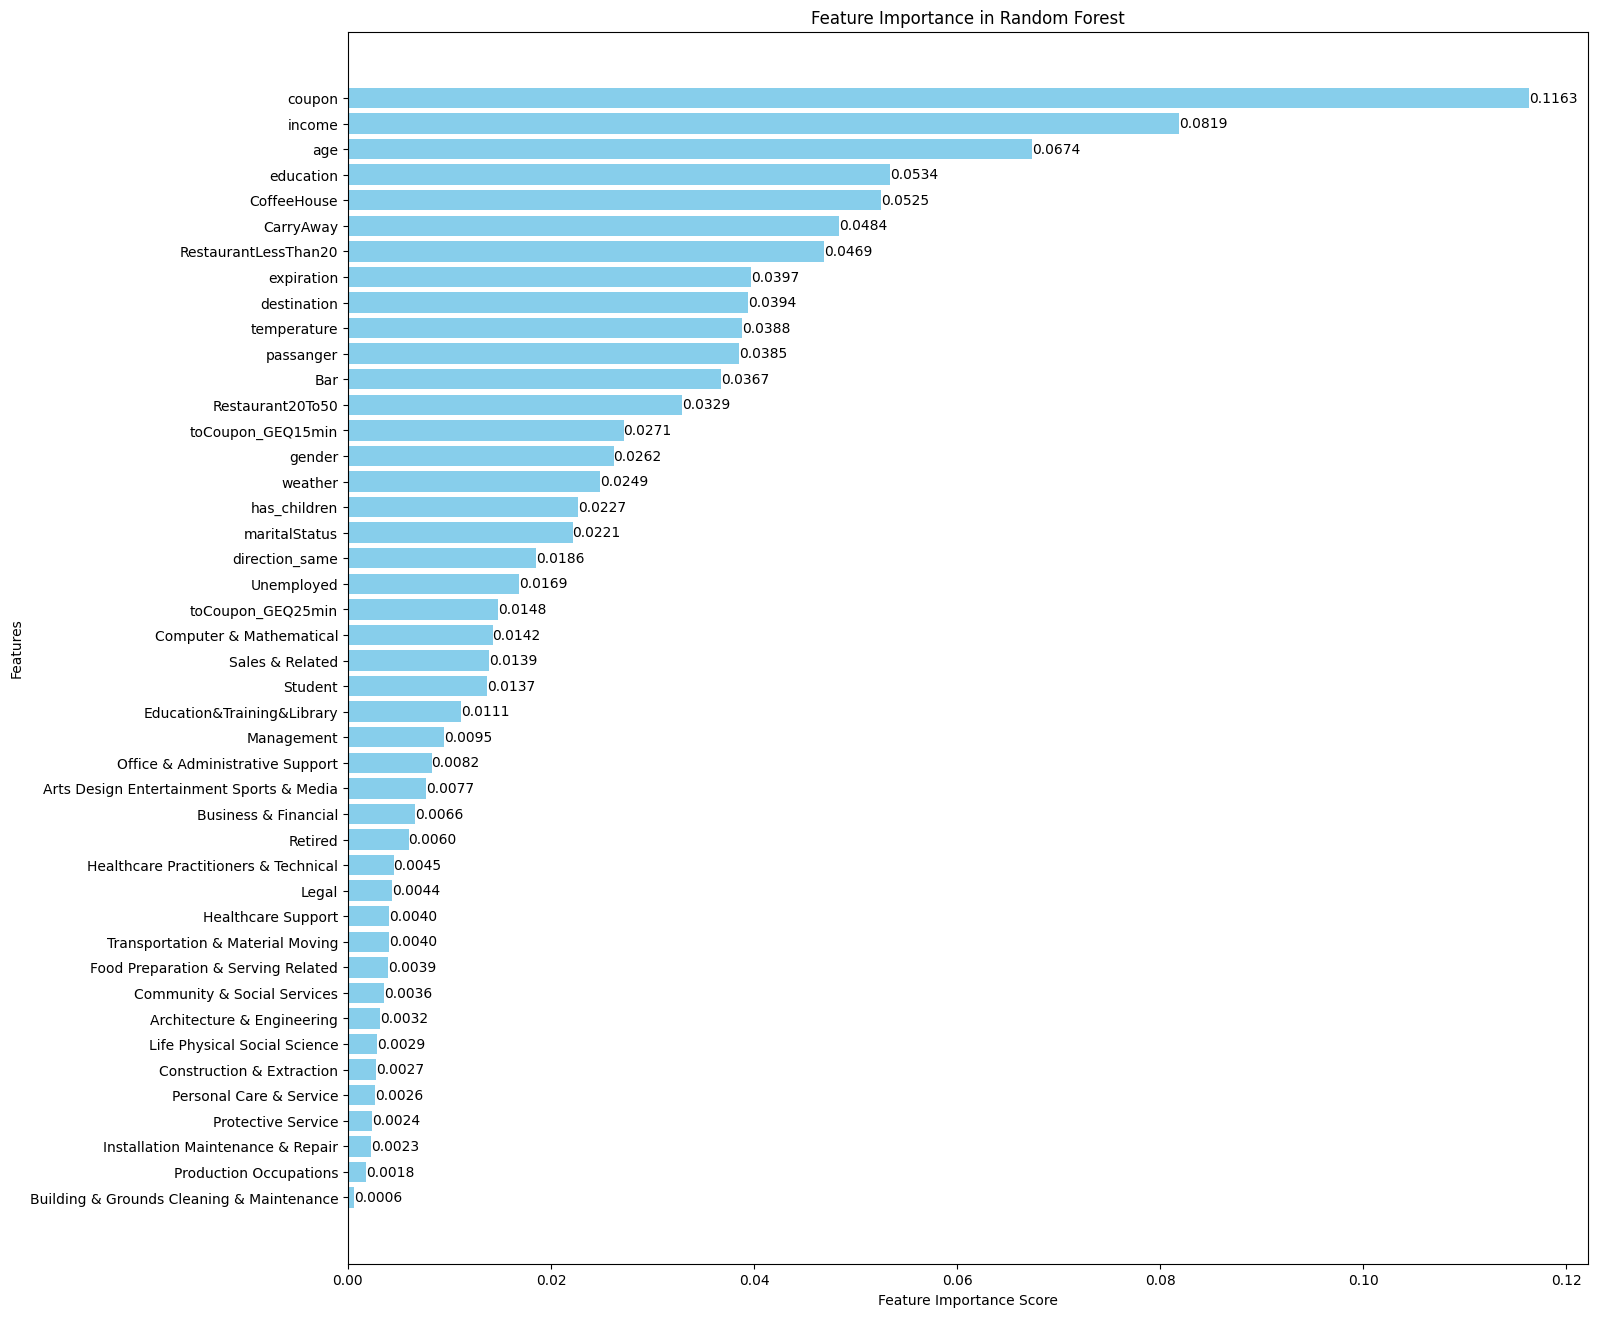

                                      Feature  Importance
4                                      coupon    0.116324
11                                     income    0.081875
7                                         age    0.067427
10                                  education    0.053440
13                                CoffeeHouse    0.052492
14                                  CarryAway    0.048371
15                       RestaurantLessThan20    0.046876
5                                  expiration    0.039698
0                                 destination    0.039389
3                                 temperature    0.038805
1                                   passanger    0.038505
12                                        Bar    0.036745
16                           Restaurant20To50    0.032945
17                          toCoupon_GEQ15min    0.027147
6                                      gender    0.026173
2                                     weather    0.024864
9             

In [ ]:

from sklearn.metrics import accuracy_score,classification_report

rfc=RandomForestClassifier(**cv_rfc.best_params_,random_state=42)
rfc_var_imp = rfc.fit(x_train,y_train)
# Get feature importances
feature_importances = rfc_var_imp.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(16,16))
bars = plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")

# Add value labels to bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.4f}", va='center')

# Formatting
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()

# Print feature importance values
print(importance_df)


In [ ]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)
rfc_train_accuracy=accuracy_score(rfc_train_pred,y_train)
rfc_test_accuracy=accuracy_score(rfc_test_pred,y_test)
print('Training Accuracy for Random Forest Classifier',rfc_train_accuracy)
print('Testing Accuracy for Random Forest Classifier',rfc_test_accuracy)
print(classification_report(rfc_test_pred,y_test))

Training Accuracy for Random Forest Classifier 0.947062621045836
Testing Accuracy for Random Forest Classifier 0.7166828009035172
              precision    recall  f1-score   support

           0       0.58      0.72      0.65      1106
           1       0.82      0.71      0.76      1993

    accuracy                           0.72      3099
   macro avg       0.70      0.72      0.70      3099
weighted avg       0.74      0.72      0.72      3099



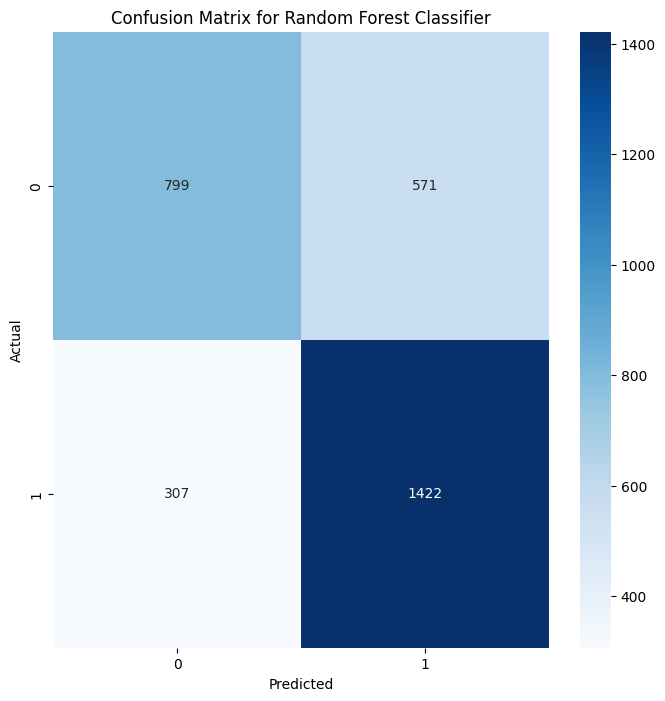

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,rfc_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

XG Boosting Algorithm

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

xgboost=XGBClassifier(n_estimators=500,learning_rate=0.05,random_state=42)
xgboost.fit(x_train,y_train)
xgboost_train_pred=xgboost.predict(x_train)
xgboost_test_pred=xgboost.predict(x_test)
xgboost_train_accuracy=accuracy_score(xgboost_train_pred,y_train)
xgboost_test_accuracy=accuracy_score(xgboost_test_pred,y_test)
print('Training Accuracy for XGB Classifier',xgboost_train_accuracy)
print('Testing Accuracy for XGB Classifier',xgboost_test_accuracy)
print(classification_report(xgboost_test_pred,y_test))

Training Accuracy for XGB Classifier 0.8727135786528943
Testing Accuracy for XGB Classifier 0.7324943530171023
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      1217
           1       0.80      0.74      0.77      1882

    accuracy                           0.73      3099
   macro avg       0.72      0.73      0.72      3099
weighted avg       0.74      0.73      0.73      3099



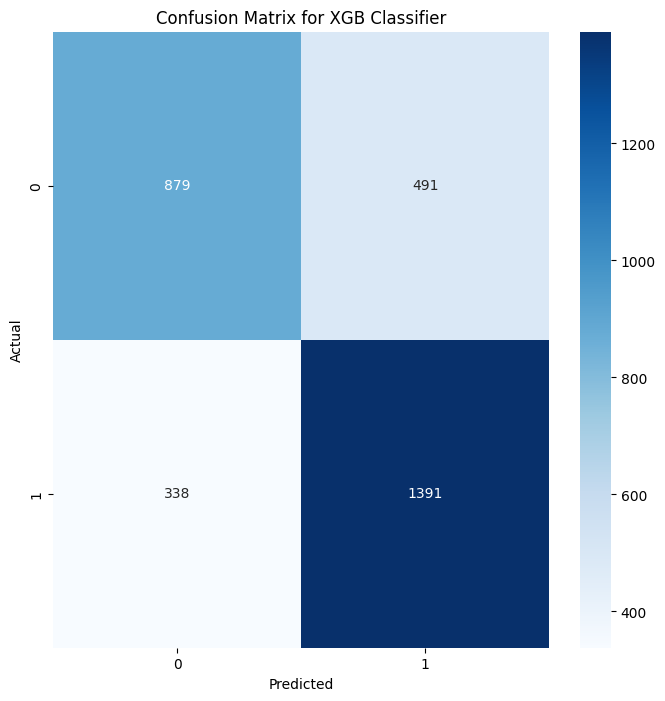

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,xgboost_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGB Classifier')
plt.show()

LGBM Algorithm

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.05,n_estimators=500)
lgbm.fit(x_train,y_train)
lgbm_train_pred=lgbm.predict(x_train)
lgbm_test_pred=lgbm.predict(x_test)
lgbm_train_accuracy=accuracy_score(y_train,lgbm_train_pred)
lgbm_test_accuracy=accuracy_score(y_test,lgbm_test_pred)
print('Training Accuracy for LGBM Classifier',lgbm_train_accuracy)
print('Testing Accuracy for LGBM Classifier',lgbm_test_accuracy)
print(classification_report(lgbm_test_pred,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5283, number of negative: 4011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 9294, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568431 -> initscore=0.275454
[LightGBM] [Info] Start training from score 0.275454
Training Accuracy for LGBM Classifier 0.8778782009898859
Testing Accuracy for LGBM Classifier 0.7437883188125202
              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1198
           1       0.82      0.75      0.78      1901

    accuracy                           0.74      3099
   macro avg       0.73      0.74    

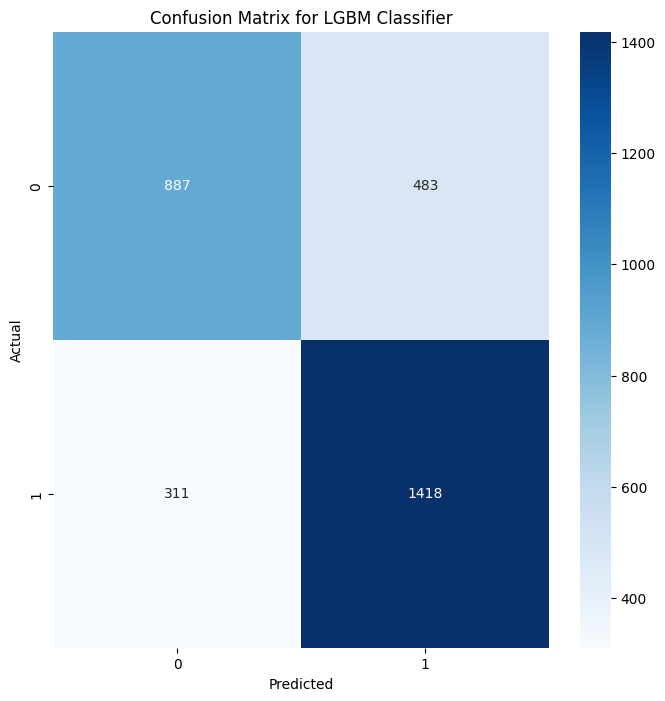

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,lgbm_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for LGBM Classifier')
plt.show()

SVC Algorithm

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc_train_pred=svc.predict(x_train)
svc_test_pred=svc.predict(x_test)
svc_train_accuracy=accuracy_score(y_train,svc_train_pred)
svc_test_accuracy=accuracy_score(y_test,svc_test_pred)
print('Training Accuracy for SVC Classifier',svc_train_accuracy)
print('Testing Accuracy for SVC Classifier',svc_test_accuracy)
print(classification_report(svc_test_pred,y_test))

Training Accuracy for SVC Classifier 0.7157305788680869
Testing Accuracy for SVC Classifier 0.6637625040335592
              precision    recall  f1-score   support

           0       0.48      0.67      0.56       992
           1       0.81      0.66      0.73      2107

    accuracy                           0.66      3099
   macro avg       0.64      0.66      0.64      3099
weighted avg       0.70      0.66      0.67      3099



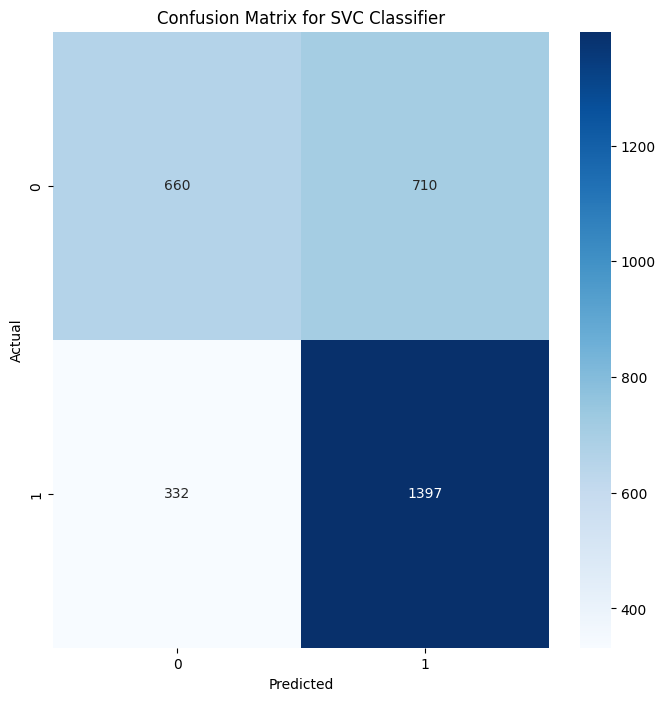

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,svc_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC Classifier')
plt.show()

CatBoost Algorithm

In [ ]:
from catboost import CatBoostClassifier

from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(learning_rate=0.05,n_estimators=500)
cat_boost.fit(x_train,y_train)
cat_boost_train_pred=cat_boost.predict(x_train)
cat_boost_test_pred=cat_boost.predict(x_test)
cat_boost_train_accuracy=accuracy_score(y_train,cat_boost_train_pred)
cat_boost_test_accuracy=accuracy_score(y_test,cat_boost_test_pred)
print('Training Accuracy for catboost Classifier',cat_boost_train_accuracy)
print('Testing Accuracy for catboost Classifier',cat_boost_test_accuracy)
print(classification_report(cat_boost_test_pred,y_test))


0:	learn: 0.6868850	total: 51.2ms	remaining: 25.5s
1:	learn: 0.6795019	total: 55.3ms	remaining: 13.8s
2:	learn: 0.6728595	total: 58.9ms	remaining: 9.76s
3:	learn: 0.6657788	total: 62.2ms	remaining: 7.71s
4:	learn: 0.6601656	total: 65.8ms	remaining: 6.51s
5:	learn: 0.6541940	total: 69.1ms	remaining: 5.69s
6:	learn: 0.6492204	total: 72.6ms	remaining: 5.11s
7:	learn: 0.6453617	total: 76ms	remaining: 4.67s
8:	learn: 0.6409073	total: 79.5ms	remaining: 4.33s
9:	learn: 0.6373332	total: 83ms	remaining: 4.07s
10:	learn: 0.6346327	total: 86.5ms	remaining: 3.84s
11:	learn: 0.6325362	total: 90ms	remaining: 3.66s
12:	learn: 0.6289080	total: 93.5ms	remaining: 3.5s
13:	learn: 0.6265424	total: 97.2ms	remaining: 3.37s
14:	learn: 0.6240401	total: 104ms	remaining: 3.35s
15:	learn: 0.6212727	total: 107ms	remaining: 3.24s
16:	learn: 0.6198479	total: 111ms	remaining: 3.15s
17:	learn: 0.6181988	total: 114ms	remaining: 3.06s
18:	learn: 0.6164929	total: 118ms	remaining: 2.98s
19:	learn: 0.6142996	total: 121ms	

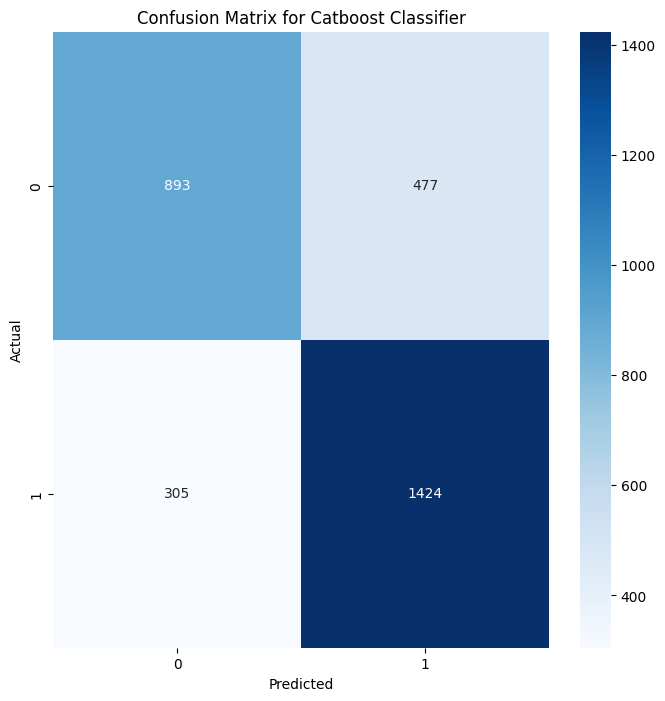

In [ ]:
plt.figure(figsize=(8,8))
cm=confusion_matrix(y_test,cat_boost_test_pred)
sns.heatmap(cm,fmt='d',annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Catboost Classifier')
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
rfc_probs = rfc_var_imp.predict_proba(x_test)[:,1]
xgb_probs = xgboost.predict_proba(x_test)[:,1]
lgbm_probs = lgbm.predict_proba(x_test)[:,1]
catboost_probs = cat_boost.predict_proba(x_test)[:,1]

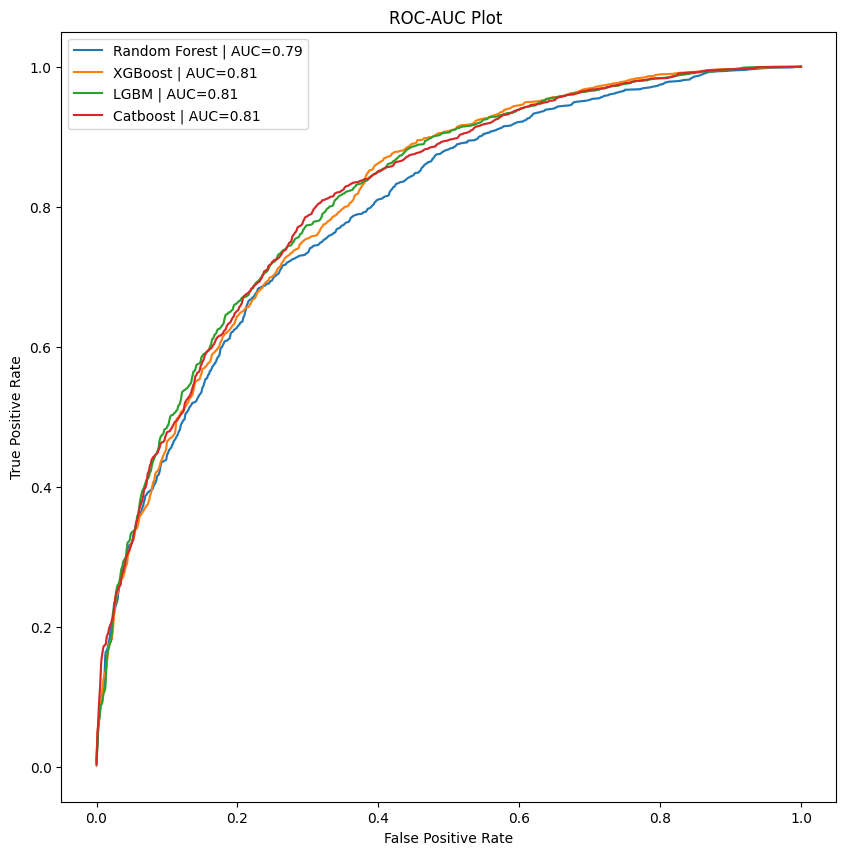

In [ ]:
from sklearn.metrics  import roc_auc_score,roc_curve


rfc_auc=roc_auc_score(y_test,rfc_probs)
xgb_auc=roc_auc_score(y_test,xgb_probs)
lgbm_auc=roc_auc_score(y_test,lgbm_probs)

catboost_auc=roc_auc_score(y_test,catboost_probs)
rfc_fpr,rfc_tpr,rfc_threshold = roc_curve(y_test,rfc_probs)
xgb_fpr,xgb_tpr,xgb_threshold = roc_curve(y_test,xgb_probs)
lgbm_fpr,lgbm_tpr,lgbm_threshold = roc_curve(y_test,lgbm_probs)

catboost_fpr,catboost_tpr,catboost_threshold = roc_curve(y_test,catboost_probs)
plt.figure(figsize=(10,10))
sns.lineplot(x=rfc_fpr,y=rfc_tpr,label='Random Forest | AUC={:.2f}'.format(rfc_auc))
sns.lineplot(x=xgb_fpr,y=xgb_tpr,label='XGBoost | AUC={:.2f}'.format(xgb_auc))
sns.lineplot(x=lgbm_fpr,y=lgbm_tpr,label='LGBM | AUC={:.2f}'.format(lgbm_auc))
sns.lineplot(x=catboost_fpr,y=catboost_tpr,label='Catboost | AUC={:.2f}'.format(catboost_auc))
plt.title('ROC-AUC Plot ')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

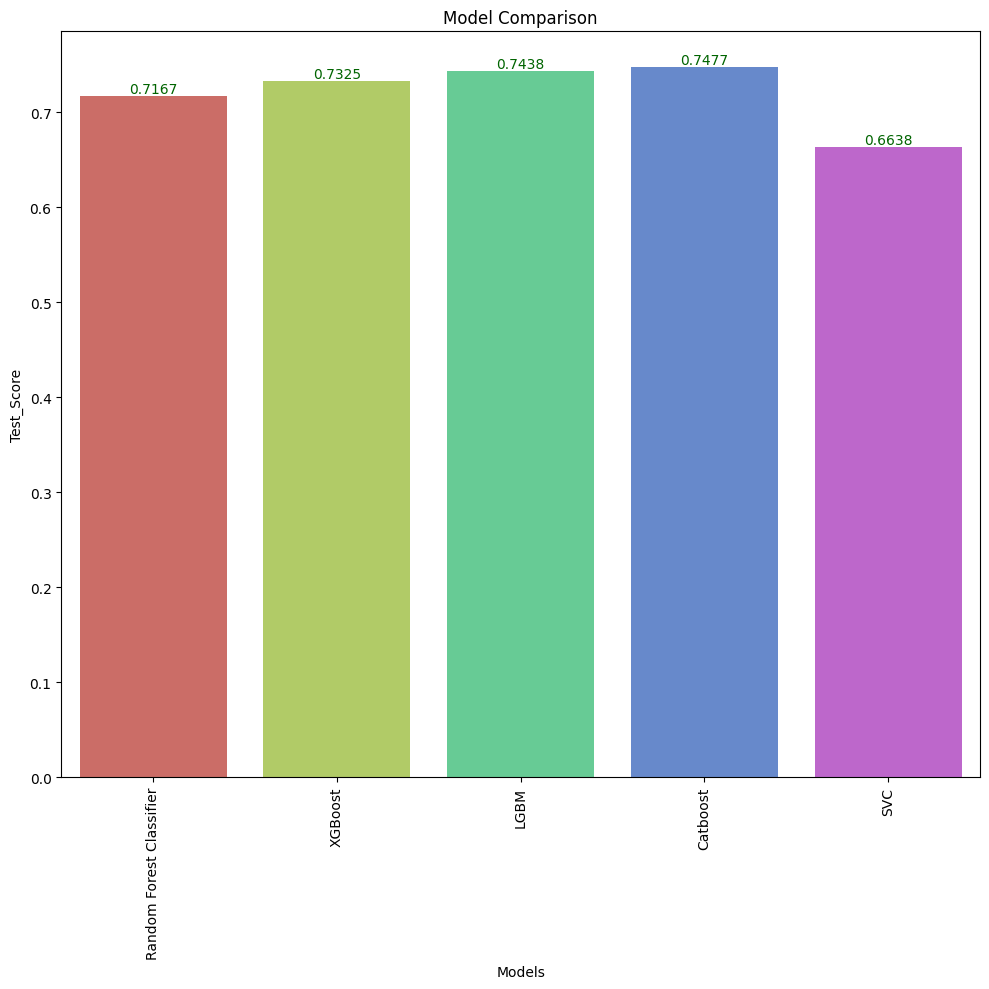

In [ ]:
results = pd.DataFrame(data={'Models':['Random Forest Classifier','XGBoost','LGBM','Catboost','SVC'],
                             'Train_Score':[rfc_train_accuracy,xgboost_train_accuracy,lgbm_train_accuracy,cat_boost_train_accuracy,svc_train_accuracy],
                             'Test_Score':[rfc_test_accuracy,xgboost_test_accuracy,lgbm_test_accuracy,cat_boost_test_accuracy,svc_test_accuracy]})
plt.figure(figsize=(10,10))
ax=sns.barplot(x='Models',y='Test_Score',data=results,palette='hls')
plt.title('Model Comparison')
plt.xticks(rotation=90)
for rect in ax.patches:
      ax.text(rect.get_x()+rect.get_width()/2,rect.get_height(),f'{rect.get_height():.4f}',
            ha='center',va='bottom',color='darkgreen')
plt.tight_layout()
plt.show()